In [12]:
import pandas as pd
import numpy as np
import os 
import copy
import itertools

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold


#model 
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#plotting
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
user_data=pd.read_csv('/Users/christina/Desktop/Data Career/User_Behavior/Spotify_User_Behavior.csv')

In [7]:
#checking for NA values
user_data.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

# EDA

key findings for EDA in words here (abstract)

Analyzed product usage patterns <br>
content preferences <br>
usage scenarios and time <br>

inform focused strategic product development. 

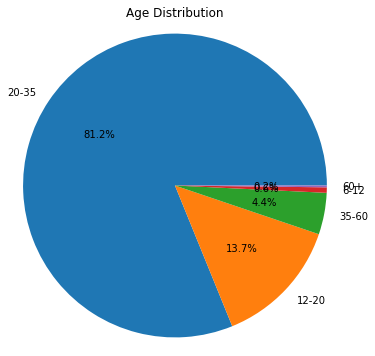

In [24]:
age_counts = user_data['Age'].value_counts()

# Extracting labels and counts
labels = age_counts.index
sizes = age_counts.values

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%')  # autopct displays the percentage
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding a title
plt.title('Age Distribution')

# Display the plot
plt.show()

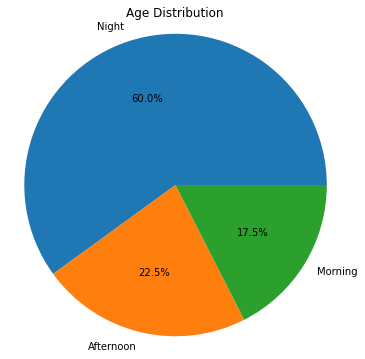

In [25]:
age_counts = user_data['music_time_slot'].value_counts()

# Extracting labels and counts
labels = age_counts.index
sizes = age_counts.values

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%')  # autopct displays the percentage
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding a title
plt.title('Listening Time Distribution')

# Display the plot
plt.show()

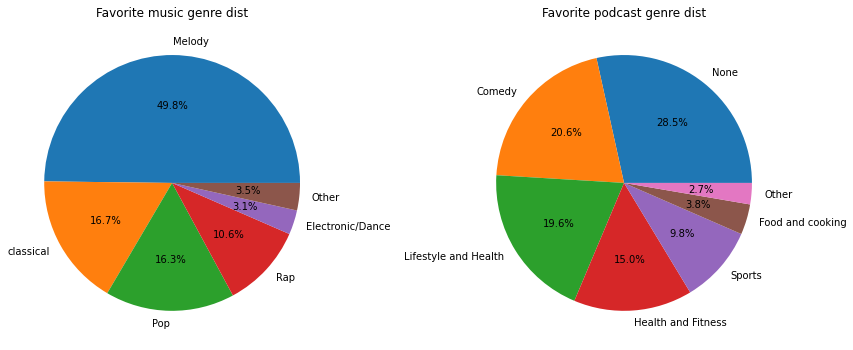

        Music Genre  Music Genre Percentage
0            Melody               49.807692
1         classical               16.730769
2               Pop               16.346154
3               Rap               10.576923
4  Electronic/Dance                3.076923
5             Other                3.461538
          Podcast Genre  Podcast Genre Percentage
0                  None                 28.461538
1                Comedy                 20.576923
2  Lifestyle and Health                 19.615385
3    Health and Fitness                 15.000000
4                Sports                  9.807692
5      Food and cooking                  3.846154
6                 Other                  2.692308


In [32]:
# Calculate percentages
total1 = sum(sizes1)
percentages1 = [(size / total1) * 100 for size in sizes1]

total2 = sum(sizes2)
percentages2 = [(size / total2) * 100 for size in sizes2]

# Identify categories with percentages less than 3% and group them into "Other"
threshold = 3
other_index1 = [i for i, percent in enumerate(percentages1) if percent < threshold]
other_index2 = [i for i, percent in enumerate(percentages2) if percent < threshold]

sizes1_other = sum([sizes1[i] for i in other_index1])
sizes2_other = sum([sizes2[i] for i in other_index2])

labels1_other = ['Other']
labels2_other = ['Other']

if sizes1_other > 0:
    sizes1_other_percent = (sizes1_other / total1) * 100
    sizes1 = [sizes1[i] for i in range(len(sizes1)) if i not in other_index1] + [sizes1_other]
    labels1 = [labels1[i] for i in range(len(labels1)) if i not in other_index1] + labels1_other
    percentages1 = [percent for percent in percentages1 if percent >= threshold] + [sizes1_other_percent]

if sizes2_other > 0:
    sizes2_other_percent = (sizes2_other / total2) * 100
    sizes2 = [sizes2[i] for i in range(len(sizes2)) if i not in other_index2] + [sizes2_other]
    labels2 = [labels2[i] for i in range(len(labels2)) if i not in other_index2] + labels2_other
    percentages2 = [percent for percent in percentages2 if percent >= threshold] + [sizes2_other_percent]

# Plotting the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(sizes1, labels=labels1, autopct='%1.1f%%')
axes[0].set_title('Favorite music genre dist')

axes[1].pie(sizes2, labels=labels2, autopct='%1.1f%%')
axes[1].set_title('Favorite podcast genre dist')

plt.tight_layout()
plt.show()

# Create a table of results
results_df1 = pd.DataFrame({
    'Music Genre': labels1,
    'Music Genre Percentage': percentages1,
})

results_df2= pd.DataFrame({
    'Podcast Genre': labels2,
    'Podcast Genre Percentage': percentages2
})

print(results_df1)
print(results_df2)


<AxesSubplot:xlabel='spotify_subscription_plan', ylabel='count'>

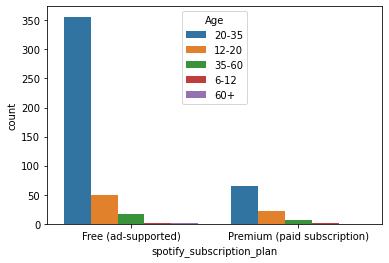

In [10]:

sns.countplot(x='spotify_subscription_plan',data=user_data,hue='spotify_usage_period')

<AxesSubplot:xlabel='spotify_subscription_plan', ylabel='count'>

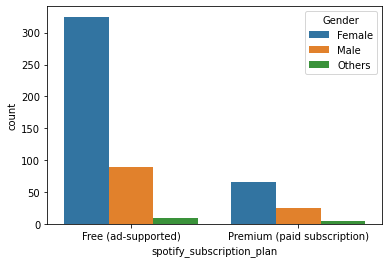

In [12]:
sns.countplot(x='spotify_subscription_plan',data=user_data,hue='Gender')

<AxesSubplot:xlabel='preffered_premium_plan', ylabel='count'>

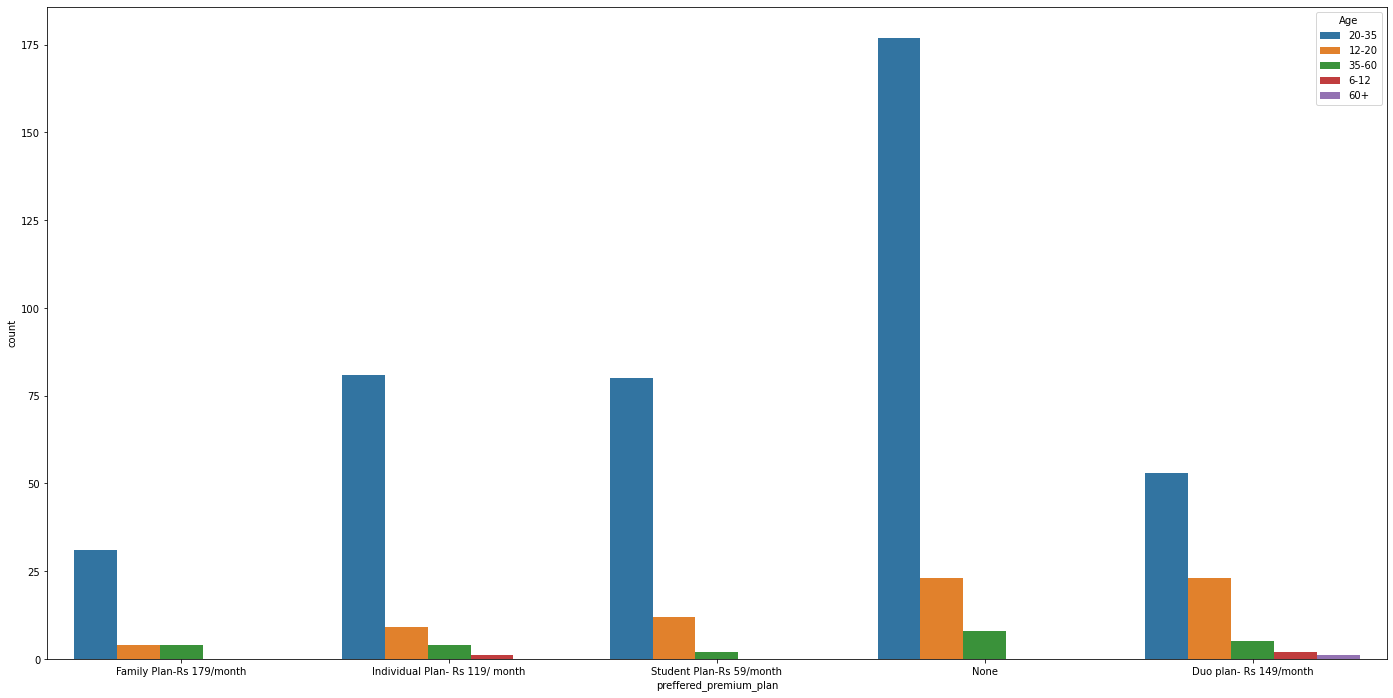

In [16]:
fig, ax = plt.subplots(1,1, figsize = (24,12))
sns.countplot(x='preffered_premium_plan',data=user_data,hue='Age')

In [ ]:
age_counts = user_data['music_time_slot'].value_counts()

# Extracting labels and counts
labels = age_counts.index
sizes = age_counts.values

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%')  # autopct displays the percentage
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding a title
plt.title('Age Distribution')

# Display the plot
plt.show()

In [ ]:
user_data_nomial
#gender #spotify_listening_device #spotify_subscription_plan
#preffered_premium_plan #preferred_listening_content
#fav_music_genre #music_Influencial_mood #music_expl_method
#pod_lis_frequency #fav_pod_genre #preffered_pod_format
#pod_host_preference #preffered_pod_duration
user_data_ordinal
#age #spotify_usage_period #premium_sub_willingness 
#music_time_slot #music_lis_frequency #music_expl_method
#pod_variety_satisfaction

可以預測訂閱和不訂閱的features 是不是不同

有訂閱和還沒有訂閱的不同人他們有什麼不同的 cluster
沒有訂閱但是有訂閱意願的他們有什麼 cluster 



<AxesSubplot:xlabel='spotify_subscription_plan', ylabel='count'>

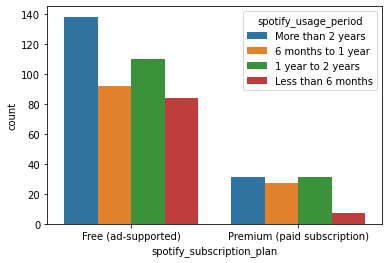

In [367]:

sns.countplot(x='spotify_subscription_plan',data=user_data,hue='spotify_usage_period')

In [9]:
user_data.head()

Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No                            None   
4                      No                            None   

  preferred_listening_content fav_music_genre music_time_slot  \
0                     Podcast          Melody           Night   
1                     Podcast             Rap       Afternoon   
2                     Podcast             Pop           Night   
3                       Music          Melody           Night   
4                       Music          Melody           Night   

                              music_Influencial_mood  \
0                              Sadness or melancholy   
1                       Social gatherings or parties   
2                       Relaxation and stress relief   
3  Relaxation and stress relief, Social gathering...   
4                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                  None   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                   None   
2            Interview                    None                   Both   
3                 None                    None                   None   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

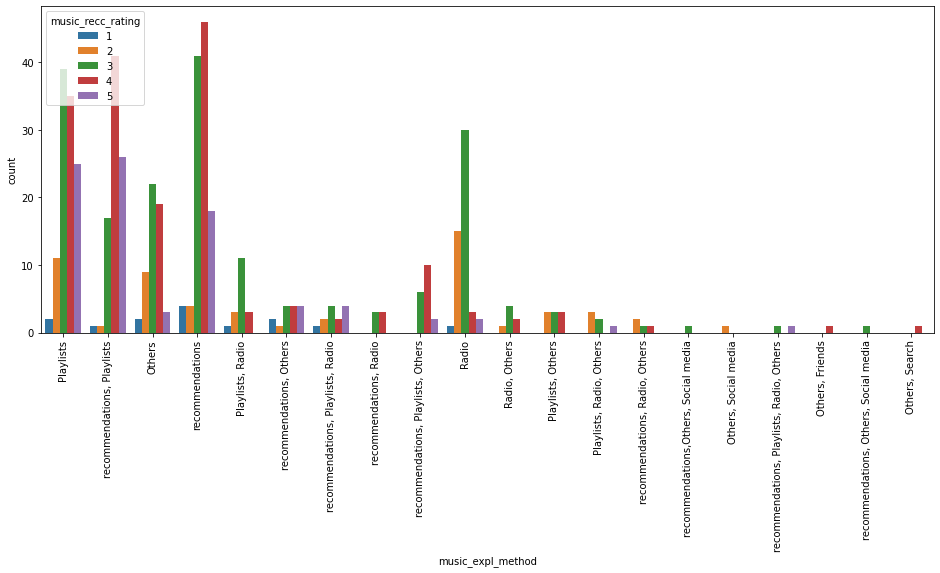

In [40]:
# Assuming user_data is your DataFrame
plt.figure(figsize=(16, 6))
sns.countplot(x='music_expl_method', data=user_data, hue='music_recc_rating')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


In [46]:
methods=['Playlists','recommendations','Others','Radio','Social media','Search']
mean_ratings=[]
for method in methods: 
    rating_mean=np.mean(user_data[user_data['music_expl_method'].str.contains(method, case=False)].music_recc_rating)
    mean_ratings.append(rating_mean)

In [53]:
mean_expl_method_rating=pd.DataFrame([methods,mean_ratings]).T
mean_expl_method_rating.columns= ['methods','mean_rating'] #

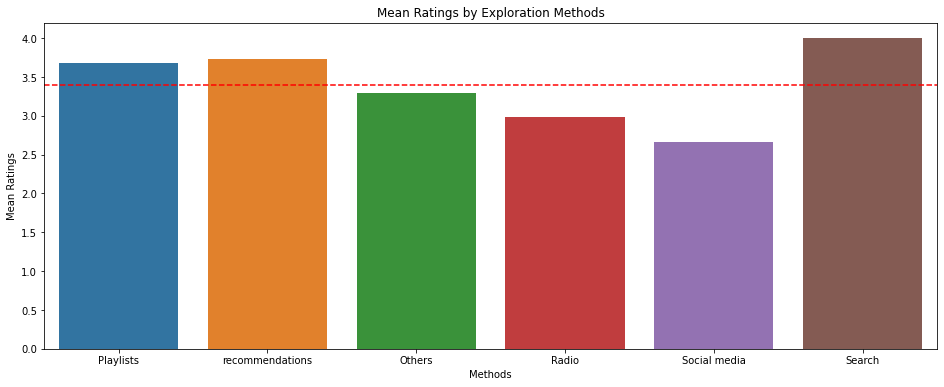

In [95]:
plt.figure(figsize=(16, 6))
sns.barplot(x=methods, y=list(mean_expl_method_rating['mean_rating'].values))

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Mean Ratings')
plt.title('Mean Ratings by Exploration Methods')
mr= mean_expl_method_rating['mean_rating'].mean()
plt.axhline(y=mr, color='r', linestyle='--', label='Mean Rating: {:.2f}'.format(mr))

# Displaying the plot
plt.show()

In [106]:
user_data['music_Influencial_mood'].str.get_dummies(sep=',')

Sadness or melancholy   Social gatherings or parties  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              1   
4                         0                              0   
..                      ...                            ...   
515                       1                              0   
516                       1                              1   
517                       0                              0   
518                       0                              0   
519                       1                              0   

      Uplifting and motivational  Relaxation and stress relief  \
0                              0                             0   
1                              0                             0   
2                              0                             1   
3                              0                             1   
4                              0                             1   
..                           ...                           ...   
515                            0                             0   
516                            1                             1   
517                            0                             1   
518                            1                             1   
519                            0                             1   

     Sadness or melancholy  Social gatherings or parties  \
0                        1                             0   
1                        0                             1   
2                        0                             0   
3                        0                             0   
4                        0                             0   
..                     ...                           ...   
515                      0                             0   
516                      0                             0   
517                      0                             0   
518                      0                             0   
519                      0                             0   

     Uplifting and motivational  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
..                          ...  
515                           1  
516                           0  
517                           0  
518                           0  
519                           0  

[520 rows x 7 columns]

In [105]:
user_data['music_expl_method'].str.get_dummies(sep=',')

Friends   Others   Playlists   Radio   Search   Social media  Others  \
0           0        0           0       0        0              0       0   
1           0        0           0       0        0              0       0   
2           0        0           0       0        0              0       0   
3           0        0           1       0        0              0       0   
4           0        0           1       0        0              0       0   
..        ...      ...         ...     ...      ...            ...     ...   
515         0        0           0       0        0              0       0   
516         0        0           0       0        0              0       1   
517         0        0           0       0        0              0       0   
518         0        1           0       0        0              0       0   
519         0        0           0       1        0              0       0   

     Playlists  Radio  recommendations  
0            1      0                0  
1            1      0                0  
2            1      0                0  
3            0      0                1  
4            0      0                1  
..         ...    ...              ...  
515          0      0                1  
516          0      0                0  
517          0      0                1  
518          0      0                1  
519          1      0                0  

[520 rows x 10 columns]

In [104]:
user_data['music_lis_frequency'].str.get_dummies(sep=',')

Before bed    Night time   Study Hours   While Traveling  \
0    0             0            0             0                 0   
1    0             0            0             0                 0   
2    0             0            0             0                 1   
3    0             0            0             0                 0   
4    0             0            0             0                 0   
..  ..           ...          ...           ...               ...   
515  0             0            0             0                 0   
516  0             0            0             0                 0   
517  0             0            0             0                 0   
518  0             0            0             0                 0   
519  0             0            0             0                 1   

      Workout session   leisure time   when cooking  Office hours  Random   \
0                   0              0              0             0        0   
1                   0              0              0             0        0   
2                   0              0              0             0        0   
3                   1              1              0             1        0   
4                   0              0              0             0        0   
..                ...            ...            ...           ...      ...   
515                 0              0              0             0        0   
516                 1              1              0             0        0   
517                 0              0              0             0        0   
518                 0              1              0             0        0   
519                 0              1              0             1        0   

     Social gatherings   Study Hours  While Traveling  Workout session  \
0                     0            0                0                0   
1                     0            0                0                1   
2                     0            1                0                0   
3                     0            0                0                0   
4                     0            0                0                0   
..                  ...          ...              ...              ...   
515                   0            0                1                0   
516                   0            0                1                0   
517                   0            0                0                0   
518                   0            0                0                1   
519                   0            1                0                0   

     leisure time  
0               1  
1               0  
2               0  
3               0  
4               1  
..            ...  
515             0  
516             0  
517             1  
518             0  
519             0  

[520 rows x 15 columns]

In [96]:
period=['leisure time','Workout session','Study Hours','While Traveling','Office hours']
#contains_playlists = user_data['music_lis_frequency'].str.contains("Playlists", case=False)

array(['leisure time', 'Workout session', 'Study Hours, While Traveling',
       'Office hours, Workout session, leisure time', 'Office hours',
       'While Traveling, leisure time',
       'Office hours, While Traveling, Workout session',
       'Office hours, While Traveling',
       'Office hours, While Traveling, leisure time',
       'Social gatherings ', 'While Traveling',
       'While Traveling, Workout session, leisure time', 'Study Hours',
       'Study Hours, leisure time', 'While Traveling, Workout session',
       'Study Hours, Workout session, leisure time',
       'Office hours, While Traveling, ', 'Workout session, leisure time',
       'While Traveling, Workout session, leisure time, Night time, when cooking',
       'Office hours, While Traveling, Workout session, leisure time',
       'Study Hours, While Traveling, Workout session, leisure time',
       'Office hours, Study Hours, While Traveling, Workout session, leisure time',
       'Office hours, leisure time', 

In [ ]:
contains_playlists = user_data['music_expl_method'].str.contains("Playlists", case=False)

# If you want to return True/False based on the condition
contains_playlists = contains_playlists.any()  # Returns True if any row contains "Playlists", else False

# If you want to create a new column with True/False values
user_data['contains_playlists'] = contains_playlists


In [34]:
data['music_Influencial_mood'].value_counts()

Relaxation and stress relief                                                                                     20
Sadness or melancholy                                                                                            18
Uplifting and motivational                                                                                       13
Social gatherings or parties                                                                                      4
Uplifting and motivational, Sadness or melancholy                                                                 3
Relaxation and stress relief, Sadness or melancholy                                                               3
Relaxation and stress relief, Uplifting and motivational                                                          3
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     2
Relaxation and stress relief, Uplifting and motivational, Sadness or mel

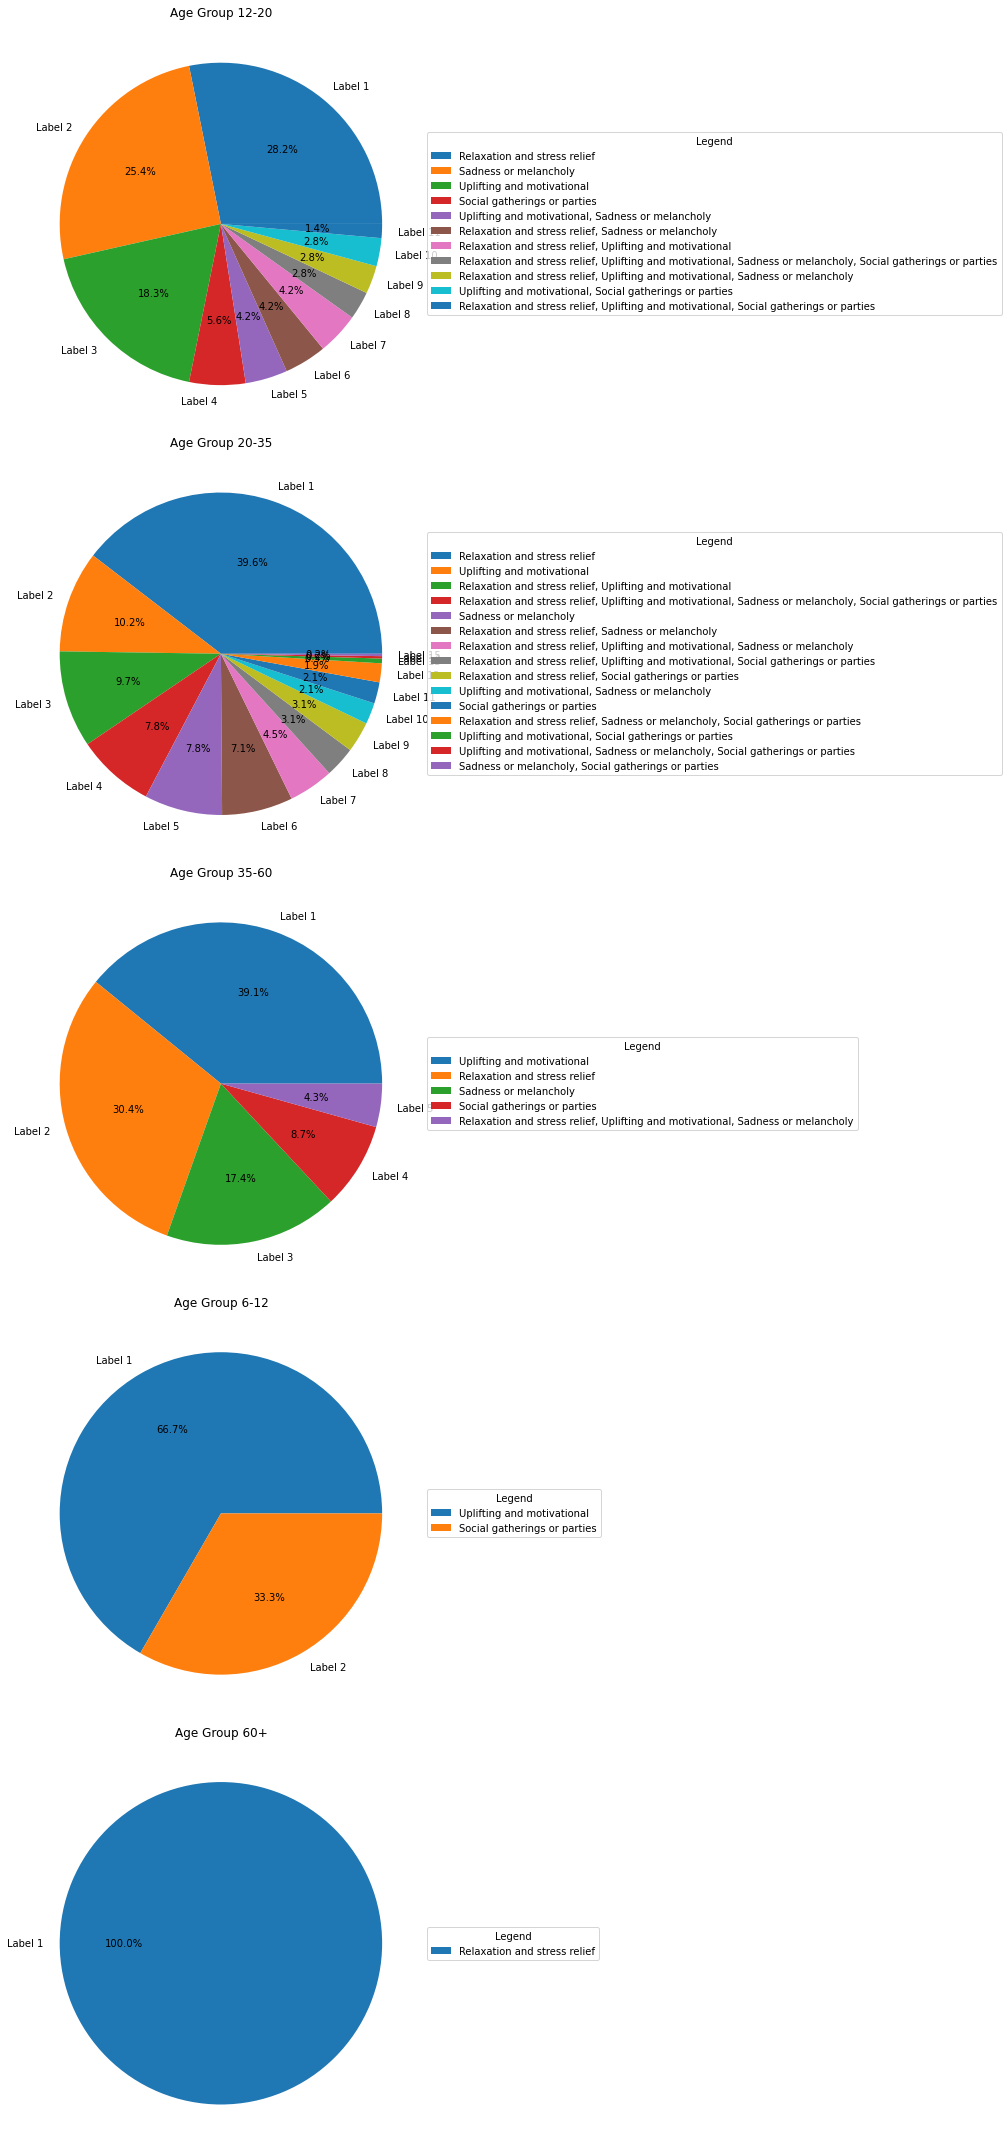

In [35]:
# Create subplots for each age group
user_data['Age'] = pd.Categorical(user_data['Age'], categories=sorted(user_data['Age'].unique()))
fig, axs = plt.subplots(user_data['Age'].nunique(),1, figsize=(15, 30))

# Define labels for legend
legend_labels = {}

# Iterate through each age group
for i, (age, data) in enumerate(user_data.groupby('Age')):
    ax = axs[i]  # Select the corresponding subplot
    ax.set_title(f'Age Group {age}')  # Set title for the subplot
    value_counts = data['music_Influencial_mood'].value_counts()
    pie = value_counts.plot.pie(ax=ax, autopct='%1.1f%%', labels=['Label ' + str(j) for j in range(1, len(value_counts) + 1)])
    pie.set_ylabel('')  # Remove y-label to avoid overlapping
    # Update legend labels
    for label, value in value_counts.items():
        if label not in legend_labels:
            legend_labels[label] = label

    ax.legend(title='Legend', labels=value_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))  # Add legend to each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

# Modelling

In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [15]:
le=LabelEncoder()
user_data_example=pd.DataFrame()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
    user_data_example[i]=le.fit_transform(user_data[i])

In [18]:
#Splitting the dataset for chisquare test
X=user_data_example.drop(['premium_sub_willingness'],axis=1)
y=user_data_example['premium_sub_willingness'] 

In [19]:
selector = SelectKBest(score_func=chi2, k=15)
X_new = selector.fit_transform(X,y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
selected_features

Index(['Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'pod_lis_frequency', 'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [22]:
X1=user_data_example.drop(['Age','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=user_data_example['premium_sub_willingness']

In [23]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 0.33333333, 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 0.33333333, 0.66666667,
        0.25      ]])

In [25]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=2)

In [26]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        66
           1       0.87      0.68      0.76        38

    accuracy                           0.85       104
   macro avg       0.85      0.81      0.83       104
weighted avg       0.85      0.85      0.84       104



In [24]:





#SVM
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))
             

#Gaussian NB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))



#Decision tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))


#Dt hypertuning
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

#random forest
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))


#rf hypertuning
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
rf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=10)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

#adaboost 
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))


#ad hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)
{'learning_rate': 0.1, 'n_estimators': 100}
ad1=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))


#gradient boost
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))


#gradient boost hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))


#Xg boost
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

#XG boost hypertuning
parameters = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.5, 1.0],'n_estimators': [50, 100, 200],'subsample': [0.5, 0.8, 1.0],'colsample_bytree': [0.5, 0.8, 1.0]}
clf=GridSearchCV(xgb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
xgb1=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=3,n_estimators=50,subsample=1.0)
xgb1.fit(X_train,y_train)
y_predx=xgb1.predict(X_test)
print(classification_report(y_test,y_predx))

SyntaxError: invalid syntax (<ipython-input-24-3f8e6897343d>, line 6)

In [6]:
category_mask= user_data.dtypes==object
category_columns = user_data.columns[category_mask].tolist()
#one hot decoding (label encoder)
all_user_data_oh=pd.DataFrame()
label_mappings = {}
for col in category_columns:
    le = LabelEncoder()
    all_user_data_oh[col] = le.fit_transform(user_data[col])
    label_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
#label_mappings

In [7]:
label_mappings['premium_sub_willingness']

{'No': 0, 'Yes': 1}

In [8]:
all_user_data_oh.describe()

Age      Gender  spotify_usage_period  spotify_listening_device  \
count  520.000000  520.000000            520.000000                520.000000   
mean     0.925000    0.276923              1.553846                  5.609615   
std      0.464698    0.508356              1.200909                  2.791313   
min      0.000000    0.000000              0.000000                  0.000000   
25%      1.000000    0.000000              0.000000                  6.000000   
50%      1.000000    0.000000              1.500000                  6.000000   
75%      1.000000    0.000000              3.000000                  6.000000   
max      4.000000    2.000000              3.000000                 14.000000   

       spotify_subscription_plan  premium_sub_willingness  \
count                 520.000000               520.000000   
mean                    0.184615                 0.357692   
std                     0.388359                 0.479782   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 1.000000   
max                     1.000000                 1.000000   

       preffered_premium_plan  preferred_listening_content  fav_music_genre  \
count              520.000000                   520.000000       520.000000   
mean                 2.363462                     0.211538         5.398077   
std                  1.309742                     0.408793         2.094399   
min                  0.000000                     0.000000         0.000000   
25%                  2.000000                     0.000000         4.000000   
50%                  3.000000                     0.000000         4.000000   
75%                  3.000000                     0.000000         7.000000   
max                  4.000000                     1.000000        10.000000   

       music_time_slot  music_Influencial_mood  music_lis_frequency  \
count       520.000000              520.000000           520.000000   
mean          1.375000                4.309615            24.798077   
std           0.828066                4.326099             9.416277   
min           0.000000                0.000000             0.000000   
25%           1.000000                0.000000            22.000000   
50%           2.000000                4.000000            26.000000   
75%           2.000000                8.000000            31.000000   
max           2.000000               14.000000            34.000000   

       music_expl_method  pod_lis_frequency  fav_pod_genre  \
count         520.000000         520.000000     520.000000   
mean            8.109615           2.359615       8.942308   
std             4.552150           1.124051       4.873006   
min             0.000000           0.000000       0.000000   
25%             4.000000           1.000000       6.000000   
50%             9.000000           3.000000      10.000000   
75%            12.250000           3.000000      12.000000   
max            19.000000           4.000000      19.000000   

       preffered_pod_format  pod_host_preference  preffered_pod_duration  \
count            520.000000            520.00000              520.000000   
mean               2.355769              1.20000                1.757692   
std                1.489321              1.08697                1.170831   
min                0.000000              0.00000                0.000000   
25%                1.000000              0.00000                1.000000   
50%                3.000000              1.00000                2.000000   
75%                4.000000              2.00000                3.000000   
max                4.000000              3.00000                3.000000   

       pod_variety_satisfaction  
count                520.000000  
mean                   1.588462  
std                    0.955595  
mi

In [9]:
X= all_user_data_oh.drop("premium_sub_willingness", axis=1).values
y= all_user_data_oh["premium_sub_willingness"].values

## Original Data

<b> train test split

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

<b> original model performance

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [12]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [14]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Make predictions
    pred = clf.predict(X_test)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    
    print("====================")

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Cross-validation scores for Logistic Regression: [-0.21428571 -0.21686747 -0.22891566 -0.26506024 -0.25301205]
Accuracy score for Logistic Regression: 0.7115384615384616
Cross-validation scores for Random Forest: [-0.21428571 -0.19277108 -0.13253012 -0.19277108 -0.21686747]
Accuracy score for Random Forest: 0.75
Cross-validation scores for Gradient Boosting: [-0.21428571 -0.22891566 -0.14457831 -0.19277108 -0.21686747]
Accuracy score for Gradient Boosting: 0.7692307692307693
Cross-validation scores for Decision Tree: [-0.35714286 -0.20481928 -0.30120482 -0.30120482 -0.18072289]
Accuracy score for Decision Tree: 0.75
Cross-validation scores for XGBoost: [-0.28571429 -0.24096386 -0.18072289 -0.22891566 -0.18072289]
Accuracy score for XGBoost: 0.7211538461538461
Cross-validation scores for AdaBoost: [-0.21428571 -0.21686747 -0.26506024 -0.25301205 -0.26506024]
Accuracy score for AdaBoost: 0.7307692307692307


➜ 使用 Random Forest, Gradient Boosting method

## Data Preprocessing

### seperate coding- Dummy Coding

nominal data in 'music_expl_method', 'music_lis_frequency','music_Influencial_mood','spotify_listening_device' cols, shouldn't be coded as label but dummy coding. 

In [27]:
str_dummies_col=['music_expl_method', 'music_lis_frequency','music_Influencial_mood','spotify_listening_device']

In [28]:
dummy_df= pd.DataFrame()
dummy_list=[]
#user_data[str_dummies_col]
for col in str_dummies_col:
    df= user_data[col].str.get_dummies(sep=',')
    
    #if the position of the option is different, will be coded differently with the 'same name'
    #'same'- or a space before
    df.columns = df.columns.str.strip()
    #merge the 'same' columns
    merged_df= df.groupby(level=0, axis=1).sum()
    #merged_df
    dummy_df= pd.concat([dummy_df, merged_df], axis=1)
    dummy_list.append(merged_df)

In [51]:
dummy_df.head()

Friends  Others  Playlists  Radio  Search  Social media  recommendations  \
0        0       0          1      0       0             0                0   
1        0       0          1      0       0             0                0   
2        0       0          1      0       0             0                0   
3        0       0          1      0       0             0                1   
4        0       0          1      0       0             0                1   

      Before bed  Night time  ...  leisure time  when cooking  \
0  0           0           0  ...             1             0   
1  0           0           0  ...             0             0   
2  0           0           0  ...             0             0   
3  0           0           0  ...             1             0   
4  0           0           0  ...             1             0   

   Relaxation and stress relief  Sadness or melancholy  \
0                             0                      1   
1                             0                      0   
2                             1                      0   
3                             1                      0   
4                             1                      0   

   Social gatherings or parties  Uplifting and motivational  \
0                             0                           0   
1                             1                           0   
2                             0                           0   
3                             1                           0   
4                             0                           0   

   Computer or laptop  Smart speakers or voice assistants  Smartphone  \
0                   0                                   1           0   
1                   1                                   0           0   
2                   0                                   1           0   
3                   0                                   1           1   
4                   0                                   0           1   

   Wearable devices  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 26 columns]

In [52]:
(dummy_df>1).any()

Friends                               False
Others                                False
Playlists                             False
Radio                                 False
Search                                False
Social media                          False
recommendations                       False
                                      False
Before bed                            False
Night time                            False
Office hours                          False
Random                                False
Social gatherings                     False
Study Hours                           False
While Traveling                       False
Workout session                       False
leisure time                          False
when cooking                          False
Relaxation and stress relief          False
Sadness or melancholy                 False
Social gatherings or parties          False
Uplifting and motivational            False
Computer or laptop              

In [29]:
df= user_data['spotify_listening_device'].str.get_dummies(sep=',')
df.columns = df.columns.str.strip()
print(df.shape)
merged_df = df.groupby(df.columns, axis=1).max()
print(merged_df.shape)

(520, 7)
(520, 4)


In [30]:
dummy_df.columns

Index(['Friends', 'Others', 'Playlists', 'Radio', 'Search', 'Social media',
       'recommendations', '', 'Before bed', 'Night time', 'Office hours',
       'Random', 'Social gatherings', 'Study Hours', 'While Traveling',
       'Workout session', 'leisure time', 'when cooking',
       'Relaxation and stress relief', 'Sadness or melancholy',
       'Social gatherings or parties', 'Uplifting and motivational',
       'Computer or laptop', 'Smart speakers or voice assistants',
       'Smartphone', 'Wearable devices'],
      dtype='object')

### seperate coding- Label Encoder

Besides the nominal data saved in 'str_dummies_col' and numerical rating 'music_recc_rating', other categorical data should be coded by label encoder

#### Dropping 'None'

in order to prevent too much data loose, this step can also be preserved to maintain characteristics of an user

In [31]:
#Check for NA
(user_data=='None').sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

➜ Preffered_premium_plan, fav_pod_genre, preffered_pod_format, pod_host_preference, preffered_pod_duration contain "None" values

(1) dropping NA cols, to maintain sample size

In [32]:
NA_containing_cols= ['preffered_premium_plan','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration']
dropping_NA_col_user_data= user_data.drop(NA_containing_cols, axis=1)

(2) dropping NA columns, preserve features 

In [33]:
user_data_NA = user_data.applymap(lambda x: None if x == 'None' else x)
user_data_noNA= user_data_NA.dropna()

#### Label Encoder

##### Original Data

In [34]:
label_df= user_data.drop(str_dummies_col, axis=1)
label_df=label_df.drop('music_recc_rating', axis=1)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
category_mask= label_df.dtypes==object
category_columns = label_df.columns[category_mask].tolist()

label_df_encoded=pd.DataFrame()
label_mapping={}

for col in category_columns:
    le= LabelEncoder()
    
    label_df_encoded[col]=le.fit_transform(label_df[col])
    label_mapping[col]= dict(zip(le.classes_, range(len(le.classes_))))

➜ the number and original value (label) are saved in <b> label_mapping </b> dictionary, for later interpretation

In [37]:
label_df_encoded['music_recc_rating']=user_data['music_recc_rating']

In [38]:
label_df_encoded.describe()

Age      Gender  spotify_usage_period  \
count  520.000000  520.000000            520.000000   
mean     0.925000    0.276923              1.553846   
std      0.464698    0.508356              1.200909   
min      0.000000    0.000000              0.000000   
25%      1.000000    0.000000              0.000000   
50%      1.000000    0.000000              1.500000   
75%      1.000000    0.000000              3.000000   
max      4.000000    2.000000              3.000000   

       spotify_subscription_plan  premium_sub_willingness  \
count                 520.000000               520.000000   
mean                    0.184615                 0.357692   
std                     0.388359                 0.479782   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 1.000000   
max                     1.000000                 1.000000   

       preffered_premium_plan  preferred_listening_content  fav_music_genre  \
count              520.000000                   520.000000       520.000000   
mean                 2.363462                     0.211538         5.398077   
std                  1.309742                     0.408793         2.094399   
min                  0.000000                     0.000000         0.000000   
25%                  2.000000                     0.000000         4.000000   
50%                  3.000000                     0.000000         4.000000   
75%                  3.000000                     0.000000         7.000000   
max                  4.000000                     1.000000        10.000000   

       music_time_slot  pod_lis_frequency  fav_pod_genre  \
count       520.000000         520.000000     520.000000   
mean          1.375000           2.359615       8.942308   
std           0.828066           1.124051       4.873006   
min           0.000000           0.000000       0.000000   
25%           1.000000           1.000000       6.000000   
50%           2.000000           3.000000      10.000000   
75%           2.000000           3.000000      12.000000   
max           2.000000           4.000000      19.000000   

       preffered_pod_format  pod_host_preference  preffered_pod_duration  \
count            520.000000            520.00000              520.000000   
mean               2.355769              1.20000                1.757692   
std                1.489321              1.08697                1.170831   
min                0.000000              0.00000                0.000000   
25%                1.000000              0.00000                1.000000   
50%                3.000000              1.00000                2.000000   
75%                4.000000              2.00000                3.000000   
max                4.000000              3.00000                3.000000   

       pod_variety_satisfaction  music_recc_rating  
count                520.000000         520.000000  
mean                   1.588462           3.503846  
std                    0.955595           0.979552  
min                    0.000000           1.000000  
25%                    1.000000           3.000000  
50%                    1.000000           3.500000  
75%                    2.000000           4.000000  
max                    4.000000           5.000000

##### Sample-Preserved Data

In [39]:
dropping_NA_col_user_data_NA= dropping_NA_col_user_data.drop(str_dummies_col, axis=1)
dropping_NA_col_user_data_NA= dropping_NA_col_user_data_NA.drop('music_recc_rating', axis=1)

In [40]:
category_mask= dropping_NA_col_user_data_NA.dtypes==object
category_columns = dropping_NA_col_user_data_NA.columns[category_mask].tolist()

dropping_NA_col_user_data_NA_encoded=pd.DataFrame()
dropnacol_label_mapping={}

for col in category_columns:
    le= LabelEncoder()
    
    dropping_NA_col_user_data_NA_encoded[col]=le.fit_transform(dropping_NA_col_user_data_NA[col])
    dropnacol_label_mapping[col]= dict(zip(le.classes_, range(len(le.classes_))))

In [41]:
dropping_NA_col_user_data_NA_encoded['music_recc_rating']=dropping_NA_col_user_data['music_recc_rating']

##### Feature-Preserved Data

In [42]:
user_data_noNA_df= user_data_noNA.drop(str_dummies_col, axis=1)
user_data_noNA_df= user_data_noNA_df.drop('music_recc_rating', axis=1)

In [43]:
category_mask= user_data_noNA_df.dtypes==object
category_columns = user_data_noNA_df.columns[category_mask].tolist()

user_data_noNA_df_encoded=pd.DataFrame()
dropna_label_mapping={}

for col in category_columns:
    le= LabelEncoder()
    
    user_data_noNA_df_encoded[col]=le.fit_transform(user_data_noNA_df[col])
    dropna_label_mapping[col]= dict(zip(le.classes_, range(len(le.classes_))))

In [166]:
user_data_noNA_df_encoded['music_recc_rating']=user_data_noNA['music_recc_rating'].reset_index(drop=True)

#### Scalling- MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler= MinMaxScaler()

##### Original Data

In [45]:
label_val= minmaxscaler.fit_transform(label_df_encoded)
label_df= pd.DataFrame(label_val)
label_df.columns= label_df_encoded.columns

##### Sample-Preserved Data

In [46]:
dropnacol_user_data_encoded_val= minmaxscaler.fit_transform(dropping_NA_col_user_data_NA_encoded)
dropnacol_user_data_encoded_df= pd.DataFrame(dropnacol_user_data_encoded_val)
dropnacol_user_data_encoded_df.columns= dropping_NA_col_user_data_NA_encoded.columns

In [47]:
dropnacol_user_data_encoded_df.isna().any()

Age                            False
Gender                         False
spotify_usage_period           False
spotify_subscription_plan      False
premium_sub_willingness        False
preferred_listening_content    False
fav_music_genre                False
music_time_slot                False
pod_lis_frequency              False
pod_variety_satisfaction       False
music_recc_rating              False
dtype: bool

##### Feature-Preserved Data

In [48]:
dropna_user_data_encoded_val= minmaxscaler.fit_transform(user_data_noNA_df_encoded)
dropna_user_data_encoded_df= pd.DataFrame(dropna_user_data_encoded_val)
dropna_user_data_encoded_df.columns= user_data_noNA_df_encoded.columns

In [49]:
dropna_user_data_encoded_df.isna().any() #.sum()

Age                            False
Gender                         False
spotify_usage_period           False
spotify_subscription_plan      False
premium_sub_willingness        False
preffered_premium_plan         False
preferred_listening_content    False
fav_music_genre                False
music_time_slot                False
pod_lis_frequency              False
fav_pod_genre                  False
preffered_pod_format           False
pod_host_preference            False
preffered_pod_duration         False
pod_variety_satisfaction       False
dtype: bool

In [50]:
user_data_noNA_df_encoded.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

## Original Data (Preprocessed)

### No Feature Selection

#### Train Test Split

In [51]:
all_coded_data= pd.concat([label_df, dummy_df], axis=1)
all_coded_data=all_coded_data.drop('',axis=1)

original_df_x= all_coded_data.drop('premium_sub_willingness', axis=1)
original_df_y= all_coded_data['premium_sub_willingness']

original_x= all_coded_data.drop('premium_sub_willingness', axis=1).values
original_y= all_coded_data['premium_sub_willingness'].values

In [52]:
X_train_o, X_test_o, y_train_o, y_test_o= train_test_split(original_x, original_y,
                                                   test_size= 0.2, random_state=42, stratify=original_y)

#### Model selection

In [56]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [57]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_o, y_train_o, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_o, y_train_o)
    # Make predictions
    pred = clf.predict(X_test_o)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_o, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print(classification_report(y_test_o,pred))
    print("====================")

Cross-validation scores for Logistic Regression: [-0.17857143 -0.20481928 -0.27710843 -0.25301205 -0.24096386]
Accuracy score for Logistic Regression: 0.7211538461538461
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79        67
         1.0       0.61      0.59      0.60        37

    accuracy                           0.72       104
   macro avg       0.70      0.69      0.69       104
weighted avg       0.72      0.72      0.72       104

Cross-validation scores for Random Forest: [-0.21428571 -0.18072289 -0.15662651 -0.20481928 -0.18072289]
Accuracy score for Random Forest: 0.7403846153846154
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80        67
         1.0       0.65      0.59      0.62        37

    accuracy                           0.74       104
   macro avg       0.72      0.71      0.71       104
weighted avg       0.74      0.74      0.74       104

Cross-validation s

### Feature Selection (Lasso)

[-0.          0.          0.          0.30084263 -0.27551188  0.08868994
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.06810918  0.         -0.         -0.          0.
  0.04114554  0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.00752488  0.01063433 -0.
  0.          0.         -0.0463331   0.11213232 -0.03627244 -0.
  0.          0.         -0.00589398  0.        ]


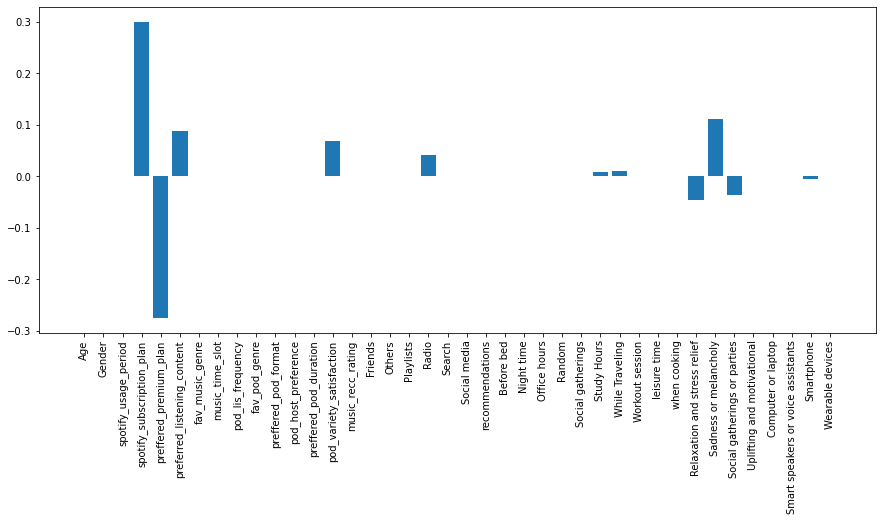

In [229]:
lasso=Lasso(alpha=0.01)
lasso_coef= lasso.fit(X_train_o, y_train_o).coef_


print(lasso_coef)
plt.figure(figsize=(15, 6))
plt.bar(original_df_x.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [230]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
original_selected_features = [dropna_df_x.columns[i] for i in non_zero_indices]
print(original_selected_features)

['spotify_subscription_plan', 'preffered_premium_plan', 'preferred_listening_content', 'pod_variety_satisfaction', 'Radio', 'Study Hours', 'While Traveling', 'Relaxation and stress relief', 'Sadness or melancholy', 'Social gatherings or parties', 'Smartphone']


#### Train Test Split

In [307]:
lasso_original_df_x= all_coded_data[original_selected_features]
lasso_original_df_y= all_coded_data['premium_sub_willingness']

lasso_original_x= lasso_original_df_x.values
lasso_original_y= lasso_original_df_y.values

In [308]:
X_train_lasso_o, X_test_lasso_o, y_train_lasso_o, y_test_lasso_o= train_test_split(lasso_original_x, lasso_original_y,
                                                   test_size= 0.2, random_state=42, stratify=lasso_original_y)

#### Model selection

In [309]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [310]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_lasso_o, y_train_lasso_o, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_lasso_o, y_train_lasso_o)
    # Make predictions
    pred = clf.predict(X_test_lasso_o)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_lasso_o, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.20238095 -0.18072289 -0.25301205 -0.24096386 -0.21686747]
Accuracy score for Logistic Regression: 0.75
Cross-validation scores for Random Forest: [-0.16666667 -0.19277108 -0.24096386 -0.19277108 -0.22891566]
Accuracy score for Random Forest: 0.75
Cross-validation scores for Gradient Boosting: [-0.25       -0.15662651 -0.22891566 -0.1686747  -0.20481928]
Accuracy score for Gradient Boosting: 0.7596153846153846
Cross-validation scores for Decision Tree: [-0.19047619 -0.22891566 -0.31325301 -0.20481928 -0.20481928]
Accuracy score for Decision Tree: 0.7211538461538461
Cross-validation scores for XGBoost: [-0.17857143 -0.13253012 -0.27710843 -0.19277108 -0.18072289]
Accuracy score for XGBoost: 0.7596153846153846
Cross-validation scores for AdaBoost: [-0.25       -0.13253012 -0.20481928 -0.18072289 -0.21686747]
Accuracy score for AdaBoost: 0.7403846153846154


### Feature selection- SelectKBest

In [300]:
from sklearn.feature_selection import SelectKBest, chi2

In [301]:
fs = SelectKBest(score_func= chi2, k=10)
fs_original_X= fs.fit(original_x, original_y)

In [302]:
selected_feature_indices = fs.get_support(indices=True)
selected_features = all_coded_data.columns[selected_feature_indices]
selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'Playlists', 'Social gatherings',
       'when cooking', 'Relaxation and stress relief',
       'Uplifting and motivational', 'Computer or laptop',
       'Smart speakers or voice assistants'],
      dtype='object')

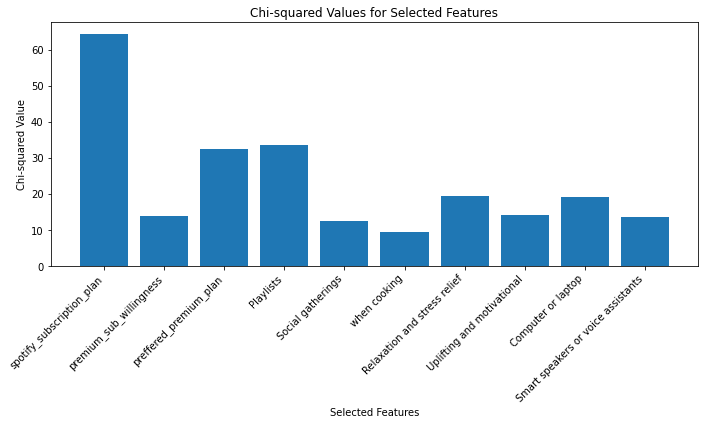

In [303]:
chi_scores = fs.scores_

# Get the chi-squared scores for selected features
selected_chi_scores = chi_scores[selected_feature_indices]

# Get the names of selected features
selected_features_names = all_coded_data.columns[selected_feature_indices]

# Plot the chi-squared scores for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_names, selected_chi_scores)
plt.xlabel('Selected Features')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Train Test Split

In [361]:
fs_original_df_x= all_coded_data[selected_features]
fs_original_df_x=fs_original_df_x.drop('premium_sub_willingness', axis=1)
fs_original_df_y= all_coded_data['premium_sub_willingness']

fs_original_x= fs_original_df_x.values
fs_original_y= fs_original_df_y.values

In [362]:
X_train_fs_o, X_test_fs_o, y_train_fs_o, y_test_fs_o= train_test_split(fs_original_x, fs_original_y,
                                                   test_size= 0.2, random_state=42, stratify=fs_original_y)

#### Model selection

In [363]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [364]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_fs_o, y_train_fs_o, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_fs_o, y_train_fs_o)
    # Make predictions
    pred = clf.predict(X_test_fs_o)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_fs_o, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.16666667 -0.26506024 -0.25301205 -0.30120482 -0.24096386]
Accuracy score for Logistic Regression: 0.7403846153846154
Cross-validation scores for Random Forest: [-0.21428571 -0.26506024 -0.31325301 -0.22891566 -0.25301205]
Accuracy score for Random Forest: 0.6826923076923077
Cross-validation scores for Gradient Boosting: [-0.20238095 -0.25301205 -0.25301205 -0.24096386 -0.24096386]
Accuracy score for Gradient Boosting: 0.6730769230769231
Cross-validation scores for Decision Tree: [-0.23809524 -0.25301205 -0.3253012  -0.22891566 -0.25301205]
Accuracy score for Decision Tree: 0.7115384615384616
Cross-validation scores for XGBoost: [-0.21428571 -0.24096386 -0.30120482 -0.24096386 -0.25301205]
Accuracy score for XGBoost: 0.6634615384615384
Cross-validation scores for AdaBoost: [-0.17857143 -0.25301205 -0.25301205 -0.28915663 -0.25301205]
Accuracy score for AdaBoost: 0.7115384615384616


## Sample-Preserved Data 

dropping the columns (features) that contains 'None', preserving all the users (samples)'s data, therefore named <b> "sample-preseved" </b>

### No Feature Selection

#### Train Test Split

In [202]:
all_coded_data_dropnacol= pd.concat([dropnacol_user_data_encoded_df, dummy_df], axis=1)
all_coded_data_dropnacol=all_coded_data_dropnacol.drop('',axis=1)

dropnacol_df_x= all_coded_data_dropnacol.drop('premium_sub_willingness', axis=1)
dropnacol_df_y= all_coded_data_dropnacol['premium_sub_willingness']

dropnacol_x= all_coded_data_dropnacol.drop('premium_sub_willingness', axis=1).values
dropnacol_y= all_coded_data_dropnacol['premium_sub_willingness'].values

In [203]:
X_train_dropnacol, X_test_dropnacol, y_train_dropnacol, y_test_dropnacol= train_test_split(dropnacol_x, dropnacol_y,
                                                   test_size= 0.2, random_state=42, stratify=dropnacol_y)

#### Model selection

In [12]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [223]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropnacol, y_train_dropnacol, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropnacol, y_train_dropnacol)
    # Make predictions
    pred = clf.predict(X_test_dropnacol)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropnacol, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.19047619 -0.22891566 -0.27710843 -0.22891566 -0.22891566]
Accuracy score for Logistic Regression: 0.7211538461538461
Cross-validation scores for Random Forest: [-0.17857143 -0.25301205 -0.22891566 -0.22891566 -0.20481928]
Accuracy score for Random Forest: 0.7596153846153846
Cross-validation scores for Gradient Boosting: [-0.19047619 -0.27710843 -0.25301205 -0.21686747 -0.22891566]
Accuracy score for Gradient Boosting: 0.7115384615384616
Cross-validation scores for Decision Tree: [-0.22619048 -0.30120482 -0.37349398 -0.40963855 -0.31325301]
Accuracy score for Decision Tree: 0.75
Cross-validation scores for XGBoost: [-0.13095238 -0.28915663 -0.28915663 -0.27710843 -0.24096386]
Accuracy score for XGBoost: 0.7211538461538461
Cross-validation scores for AdaBoost: [-0.21428571 -0.25301205 -0.24096386 -0.28915663 -0.31325301]
Accuracy score for AdaBoost: 0.7115384615384616


### Feature Selection- Lasso

In [202]:
all_coded_data_dropnacol= pd.concat([dropnacol_user_data_encoded_df, dummy_df], axis=1)
all_coded_data_dropnacol=all_coded_data_dropnacol.drop('',axis=1)

dropnacol_df_x= all_coded_data_dropnacol.drop('premium_sub_willingness', axis=1)
dropnacol_df_y= all_coded_data_dropnacol['premium_sub_willingness']

dropnacol_x= all_coded_data_dropnacol.drop('premium_sub_willingness', axis=1).values
dropnacol_y= all_coded_data_dropnacol['premium_sub_willingness'].values

[-0.          0.          0.          0.32822303  0.10055578  0.
  0.         -0.          0.06534108  0.         -0.         -0.
  0.          0.06685869  0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.02395769  0.00686505
 -0.          0.          0.         -0.06775308  0.11718588 -0.02802987
 -0.          0.          0.         -0.07000183  0.        ]


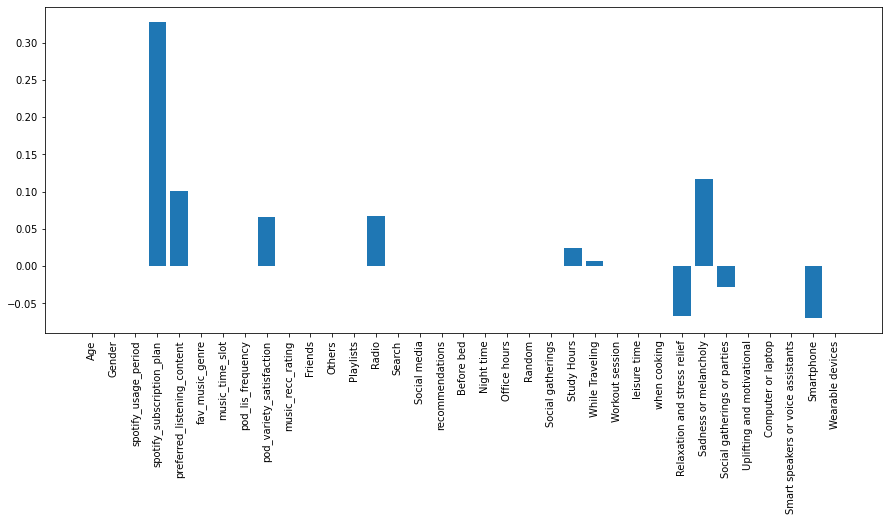

In [319]:
lasso=Lasso(alpha=0.01)
lasso_coef= lasso.fit(X_train_dropnacol, y_train_dropnacol).coef_


print(lasso_coef)
plt.figure(figsize=(15, 6))
plt.bar(dropnacol_df_x.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [324]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
dropnacol_selected_features = [dropnacol_df_x.columns[i] for i in non_zero_indices]
print(dropnacol_selected_features)

['spotify_subscription_plan', 'preferred_listening_content', 'pod_variety_satisfaction', 'Radio', 'Study Hours', 'While Traveling', 'Relaxation and stress relief', 'Sadness or melancholy', 'Social gatherings or parties', 'Smartphone']


#### Train Test Split

In [327]:
lasso_dropnacol_df_x= all_coded_data_dropnacol[dropnacol_selected_features]
dropnacol_df_y= all_coded_data_dropnacol['premium_sub_willingness']

lasso_dropnacol_x= lasso_dropnacol_df_x.values
dropnacol_y= dropnacol_df_y.values

In [328]:
X_train_dropnacol_lasso, X_test_dropnacol_lasso, y_train_dropnacol, y_test_dropnacol= train_test_split(lasso_dropnacol_x, dropnacol_y,
                                                   test_size= 0.2, random_state=42, stratify=dropnacol_y)

#### Model selection

In [289]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [329]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropnacol_lasso, y_train_dropnacol, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropnacol_lasso, y_train_dropnacol)
    # Make predictions
    pred = clf.predict(X_test_dropnacol_lasso)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropnacol, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.16666667 -0.21686747 -0.25301205 -0.24096386 -0.25301205]
Accuracy score for Logistic Regression: 0.7307692307692307
Cross-validation scores for Random Forest: [-0.19047619 -0.25301205 -0.26506024 -0.24096386 -0.21686747]
Accuracy score for Random Forest: 0.6923076923076923
Cross-validation scores for Gradient Boosting: [-0.16666667 -0.24096386 -0.26506024 -0.20481928 -0.24096386]
Accuracy score for Gradient Boosting: 0.7115384615384616
Cross-validation scores for Decision Tree: [-0.19047619 -0.24096386 -0.34939759 -0.25301205 -0.25301205]
Accuracy score for Decision Tree: 0.6923076923076923
Cross-validation scores for XGBoost: [-0.19047619 -0.25301205 -0.28915663 -0.19277108 -0.22891566]
Accuracy score for XGBoost: 0.6730769230769231
Cross-validation scores for AdaBoost: [-0.17857143 -0.22891566 -0.28915663 -0.24096386 -0.26506024]
Accuracy score for AdaBoost: 0.7211538461538461


### Feature selection- SelectKBest

In [330]:
from sklearn.feature_selection import SelectKBest, chi2

In [331]:
fs = SelectKBest(score_func= chi2, k=10)
skb_dropnacol_X= fs.fit(dropnacol_x, dropnacol_df_y)

In [337]:
skb_selected_feature_indices = fs.get_support(indices=True)
skb_selected_features = all_coded_data_dropnacol.columns[skb_selected_feature_indices]
skb_selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'fav_music_genre', 'Playlists', 'Social gatherings', 'when cooking',
       'Relaxation and stress relief', 'Uplifting and motivational',
       'Computer or laptop', 'Smart speakers or voice assistants'],
      dtype='object')

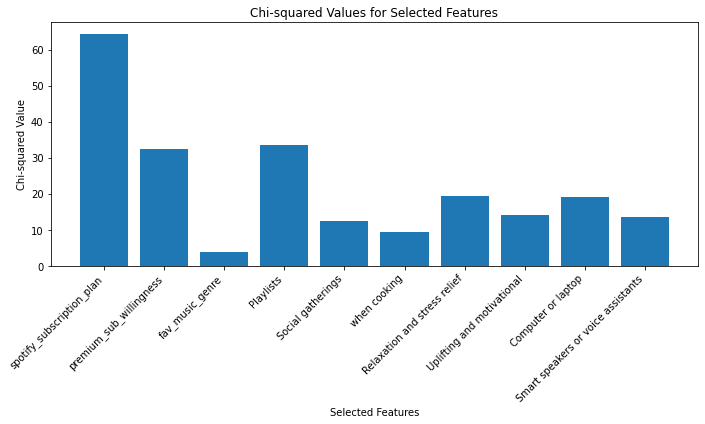

In [333]:
chi_scores = fs.scores_

# Get the chi-squared scores for selected features
selected_chi_scores = chi_scores[skb_selected_feature_indices]

# Get the names of selected features
selected_features_names = all_coded_data_dropnacol.columns[skb_selected_feature_indices]

# Plot the chi-squared scores for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_names, selected_chi_scores)
plt.xlabel('Selected Features')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Train Test Split

In [341]:
all_coded_data_dropnacol.shape

(520, 36)

In [357]:
skb_dropnacol_df_x= all_coded_data_dropnacol[skb_selected_features]
skb_dropnacol_df_x= skb_dropnacol_df_x.drop('premium_sub_willingness', axis=1)
dropnacol_df_y= all_coded_data_dropnacol['premium_sub_willingness']

skb_dropnacol_x= skb_dropnacol_df_x.values
dropnacol_y= dropnacol_df_y.values

In [358]:
X_train_dropnacol_skb, X_test_dropnacol_skb, y_train_dropnacol, y_test_dropnacol= train_test_split(skb_dropnacol_x, dropnacol_y,
                                                   test_size= 0.2, random_state=42, stratify=dropnacol_y)

#### Model selection

In [359]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [360]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropnacol_skb, y_train_dropnacol, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropnacol_skb, y_train_dropnacol)
    # Make predictions
    pred = clf.predict(X_test_dropnacol_skb)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropnacol, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.16666667 -0.26506024 -0.25301205 -0.30120482 -0.24096386]
Accuracy score for Logistic Regression: 0.7403846153846154
Cross-validation scores for Random Forest: [-0.21428571 -0.24096386 -0.28915663 -0.24096386 -0.25301205]
Accuracy score for Random Forest: 0.6826923076923077
Cross-validation scores for Gradient Boosting: [-0.20238095 -0.25301205 -0.25301205 -0.24096386 -0.24096386]
Accuracy score for Gradient Boosting: 0.6730769230769231
Cross-validation scores for Decision Tree: [-0.23809524 -0.25301205 -0.3253012  -0.22891566 -0.26506024]
Accuracy score for Decision Tree: 0.7115384615384616
Cross-validation scores for XGBoost: [-0.21428571 -0.24096386 -0.30120482 -0.24096386 -0.25301205]
Accuracy score for XGBoost: 0.6634615384615384
Cross-validation scores for AdaBoost: [-0.17857143 -0.25301205 -0.25301205 -0.28915663 -0.25301205]
Accuracy score for AdaBoost: 0.7115384615384616


## Feature-Preserved Data

### No Feature Selection

##### Train Test Split

In [295]:
dropna_user_data_encoded_df.index=user_data_noNA.index
all_coded_data_dropna=pd.merge(dropna_user_data_encoded_df, dummy_df, how='left', left_index=True, right_index=True)
all_coded_data_dropna=all_coded_data_dropna.drop('',axis=1)

dropna_df_x= all_coded_data_dropna.drop('premium_sub_willingness', axis=1)
dropna_df_y= all_coded_data_dropna['premium_sub_willingness']

dropna_x= all_coded_data_dropna.drop('premium_sub_willingness', axis=1).values
dropna_y= all_coded_data_dropna['premium_sub_willingness'].values

In [208]:
X_train_dropna, X_test_dropna, y_train_dropna, y_test_dropna= train_test_split(dropna_x, dropna_y,
                                                   test_size= 0.2, random_state=42, stratify=dropna_y)

##### Model selection

In [12]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [224]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropna, y_train_dropna, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropna, y_train_dropna)
    # Make predictions
    pred = clf.predict(X_test_dropna)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropna, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.5        -0.38888889 -0.36111111 -0.55555556 -0.28571429]
Accuracy score for Logistic Regression: 0.6666666666666666
Cross-validation scores for Random Forest: [-0.41666667 -0.33333333 -0.25       -0.41666667 -0.34285714]
Accuracy score for Random Forest: 0.7111111111111111
Cross-validation scores for Gradient Boosting: [-0.30555556 -0.5        -0.27777778 -0.5        -0.31428571]
Accuracy score for Gradient Boosting: 0.6
Cross-validation scores for Decision Tree: [-0.33333333 -0.41666667 -0.38888889 -0.58333333 -0.34285714]
Accuracy score for Decision Tree: 0.5333333333333333
Cross-validation scores for XGBoost: [-0.33333333 -0.44444444 -0.25       -0.47222222 -0.34285714]
Accuracy score for XGBoost: 0.6444444444444445
Cross-validation scores for AdaBoost: [-0.44444444 -0.41666667 -0.27777778 -0.38888889 -0.48571429]
Accuracy score for AdaBoost: 0.6888888888888889


### Feature Selection- Lasso

[-0.          0.          0.          0.17189607 -0.          0.08939117
 -0.          0.         -0.          0.          0.          0.
 -0.          0.09255677  0.          0.          0.         -0.
  0.01336922  0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.0991111   0.         -0.          0.11863655 -0.02268894 -0.
  0.01133798 -0.         -0.05906707 -0.        ]


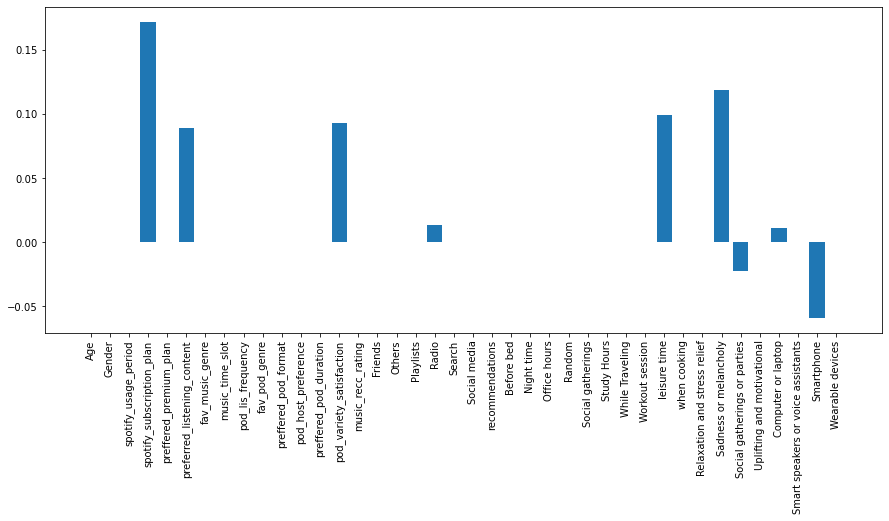

In [227]:
lasso=Lasso(alpha=0.01)
lasso_coef= lasso.fit(dropna_x, dropna_y).coef_


print(lasso_coef)
plt.figure(figsize=(15, 6))
plt.bar(dropna_df_x.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [228]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
dropna_selected_features = [dropna_df_x.columns[i] for i in non_zero_indices]
print(dropna_selected_features)

['spotify_subscription_plan', 'preferred_listening_content', 'pod_variety_satisfaction', 'Radio', 'leisure time', 'Sadness or melancholy', 'Social gatherings or parties', 'Computer or laptop', 'Smartphone']


#### Train Test Split

In [314]:
dropna_df_x_selected= all_coded_data_dropna[dropna_selected_features]
dropna_df_y= all_coded_data_dropna['premium_sub_willingness']

dropna_x_selected= dropna_df_x_selected.values
dropna_y= all_coded_data_dropna['premium_sub_willingness'].values

In [315]:
X_train_dropna_selected, X_test_dropna_selected, y_train_dropna, y_test_dropna= train_test_split(
                                                   dropna_x_selected, dropna_y,
                                                   test_size= 0.2, random_state=42, stratify=dropna_y)

####  Model selection

In [316]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [317]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropna_selected, y_train_dropna, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropna_selected, y_train_dropna)
    # Make predictions
    pred = clf.predict(X_test_dropna_selected)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropna, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.33333333 -0.27777778 -0.30555556 -0.41666667 -0.25714286]
Accuracy score for Logistic Regression: 0.7333333333333333
Cross-validation scores for Random Forest: [-0.25       -0.22222222 -0.19444444 -0.36111111 -0.31428571]
Accuracy score for Random Forest: 0.6888888888888889
Cross-validation scores for Gradient Boosting: [-0.30555556 -0.27777778 -0.25       -0.41666667 -0.34285714]
Accuracy score for Gradient Boosting: 0.6666666666666666
Cross-validation scores for Decision Tree: [-0.36111111 -0.19444444 -0.19444444 -0.36111111 -0.37142857]
Accuracy score for Decision Tree: 0.6222222222222222
Cross-validation scores for XGBoost: [-0.25       -0.27777778 -0.22222222 -0.33333333 -0.34285714]
Accuracy score for XGBoost: 0.6888888888888889
Cross-validation scores for AdaBoost: [-0.30555556 -0.33333333 -0.30555556 -0.41666667 -0.25714286]
Accuracy score for AdaBoost: 0.6666666666666666


### Feature selection- SelectKBest

In [293]:
from sklearn.feature_selection import SelectKBest, chi2

In [296]:
fs = SelectKBest(score_func= chi2, k=10)
skb_dropna_X= fs.fit(all_coded_data_dropna, dropna_df_y)

In [297]:
skb_selected_feature_indices = fs.get_support(indices=True)
selected_features = all_coded_data_dropna.columns[skb_selected_feature_indices]
selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'preferred_listening_content', 'Radio', 'Workout session',
       'Relaxation and stress relief', 'Sadness or melancholy',
       'Computer or laptop', 'Smart speakers or voice assistants',
       'Smartphone'],
      dtype='object')

In [298]:
skb_selected_feature_indices = fs.get_support(indices=True)
selected_features = all_coded_data_dropna.columns[skb_selected_feature_indices]
selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'preferred_listening_content', 'Radio', 'Workout session',
       'Relaxation and stress relief', 'Sadness or melancholy',
       'Computer or laptop', 'Smart speakers or voice assistants',
       'Smartphone'],
      dtype='object')

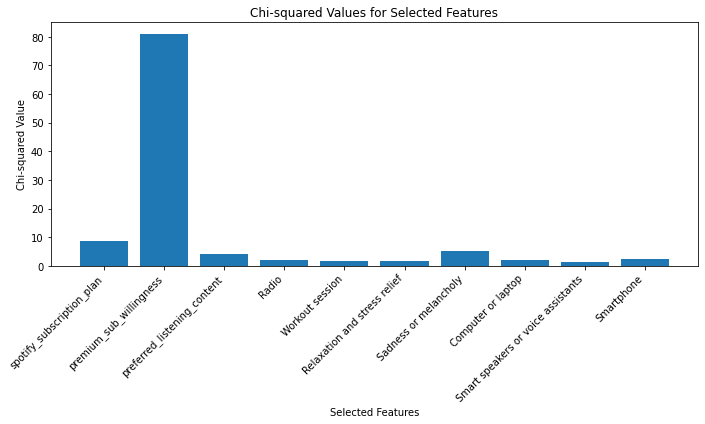

In [299]:
chi_scores = fs.scores_

# Get the chi-squared scores for selected features
selected_chi_scores = chi_scores[skb_selected_feature_indices]

# Get the names of selected features
selected_features_names = all_coded_data_dropna.columns[skb_selected_feature_indices]

# Plot the chi-squared scores for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_names, selected_chi_scores)
plt.xlabel('Selected Features')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Train Test Split

In [352]:
skb_dropna_df_x= all_coded_data_dropna[selected_features]
skb_dropna_df_x= all_coded_data_dropna.drop('premium_sub_willingness', axis=1)
dropna_df_y= all_coded_data_dropna['premium_sub_willingness']

skb_dropna_x= skb_dropna_df_x.values
dropna_y= all_coded_data_dropna['premium_sub_willingness'].values

In [353]:
X_train_dropna_skb, X_test_dropna_skb, y_train_dropna, y_test_dropna= train_test_split(skb_dropna_x, dropna_y,
                                                   test_size= 0.2, random_state=42, stratify=dropna_y)

####  Model selection

In [354]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [355]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_dropna_skb, y_train_dropna, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train_dropna_skb, y_train_dropna)
    # Make predictions
    pred = clf.predict(X_test_dropna_skb)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test_dropna, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")
    print("====================")

Cross-validation scores for Logistic Regression: [-0.5        -0.38888889 -0.36111111 -0.55555556 -0.28571429]
Accuracy score for Logistic Regression: 0.6666666666666666
Cross-validation scores for Random Forest: [-0.33333333 -0.36111111 -0.22222222 -0.36111111 -0.34285714]
Accuracy score for Random Forest: 0.6888888888888889
Cross-validation scores for Gradient Boosting: [-0.30555556 -0.5        -0.27777778 -0.5        -0.31428571]
Accuracy score for Gradient Boosting: 0.6
Cross-validation scores for Decision Tree: [-0.38888889 -0.33333333 -0.41666667 -0.52777778 -0.34285714]
Accuracy score for Decision Tree: 0.4444444444444444
Cross-validation scores for XGBoost: [-0.33333333 -0.44444444 -0.25       -0.47222222 -0.34285714]
Accuracy score for XGBoost: 0.6444444444444445
Cross-validation scores for AdaBoost: [-0.44444444 -0.41666667 -0.27777778 -0.38888889 -0.48571429]
Accuracy score for AdaBoost: 0.6888888888888889


# Subscription Willingness Classification Model

In [374]:
# Loop over each classifier
kf = KFold(n_splits=5, random_state=42, shuffle=True)
# Cross-validation
    
xbg_clf= XGBClassifier()
cv_scores = cross_val_score(clf, X_train_dropna_skb, y_train_dropna, cv=kf, scoring="neg_mean_squared_error")
print(f"Cross-validation scores: {cv_scores}")
# Fit the model to the training data
xbg_clf.fit(X_train_dropna_skb, y_train_dropna)
# Make predictions
pred = xbg_clf.predict(X_test_dropna_skb)
# Compute accuracy using the test data
accuracy = accuracy_score(y_test_dropna, pred)
print(f"Accuracy score: {accuracy}")
print("====================")

Cross-validation scores: [-0.44444444 -0.41666667 -0.27777778 -0.38888889 -0.48571429]
Accuracy score: 0.6444444444444445


Confusion Matrix:
[[ 7  9]
 [ 7 22]]


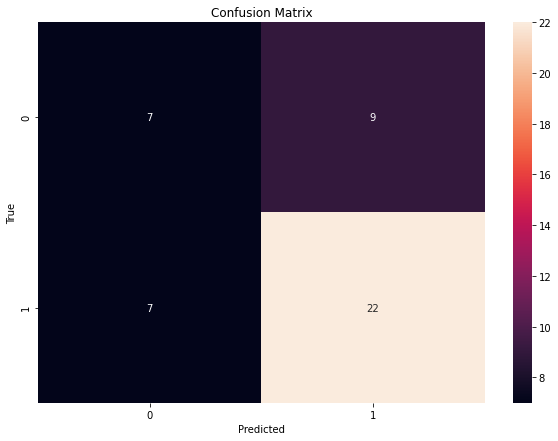

              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47        16
         1.0       0.71      0.76      0.73        29

    accuracy                           0.64        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.64      0.64      0.64        45



In [366]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_dropna, pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# classification report 
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 分類報告
print(classification_report(y_test_dropna, pred))

<AxesSubplot:ylabel='Features'>

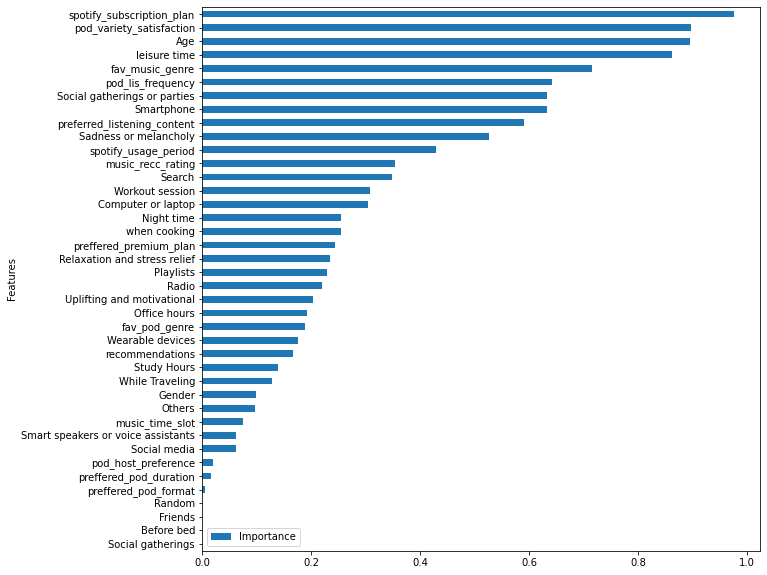

In [372]:
log= LogisticRegression()
log.fit(skb_dropna_df_x, dropna_df_y)
coefficients= log.coef_
#coefficients

avg_importance= np.mean(np.abs(coefficients), axis=0)
feature_importance= pd.DataFrame({'Features': skb_dropna_df_x.columns,
                                  'Importance': avg_importance})
feature_importance= feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Features', y='Importance', kind= 'barh', figsize=(10,10))

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [19:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


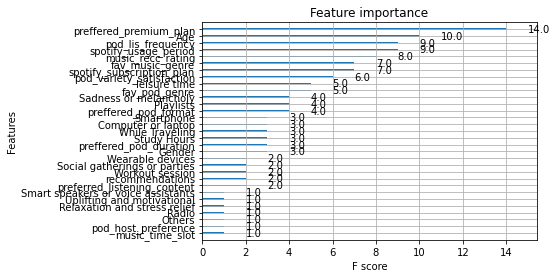

In [367]:
alluser_dmatrix = xgb.DMatrix(data=skb_dropna_df_x, label=dropna_df_y)

# Create the parameter dictionary: params
params = {"objective": "reg:linear",
          "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=alluser_dmatrix)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Feature Selection Summary

➜ Summary for original, dropnacol, dropna

### Lasso

In [230]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
original_selected_features = [dropna_df_x.columns[i] for i in non_zero_indices]
print(original_selected_features)

['spotify_subscription_plan', 'preffered_premium_plan', 'preferred_listening_content', 'pod_variety_satisfaction', 'Radio', 'Study Hours', 'While Traveling', 'Relaxation and stress relief', 'Sadness or melancholy', 'Social gatherings or parties', 'Smartphone']


In [226]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
dropnacol_selected_features = [dropna_df_x.columns[i] for i in non_zero_indices]
print(dropnacol_selected_features)

['spotify_subscription_plan', 'preffered_premium_plan', 'pod_lis_frequency', 'pod_variety_satisfaction', 'Before bed', 'Night time', 'Study Hours', 'While Traveling', 'Workout session', 'Sadness or melancholy']


In [228]:
non_zero_indices = [i for i, coef in enumerate(lasso_coef) if coef != 0]
dropna_selected_features = [dropna_df_x.columns[i] for i in non_zero_indices]
print(dropna_selected_features)

['spotify_subscription_plan', 'preferred_listening_content', 'pod_variety_satisfaction', 'Radio', 'leisure time', 'Sadness or melancholy', 'Social gatherings or parties', 'Computer or laptop', 'Smartphone']


➜ spotify_subscription_plan (1,2,3), preffered_premium_plan (1,2), preferred_listening_content(1,3), pod_variety_satisfaction(1,2,3), Radio (1,3), Study Hours (1,2), While Traveling (1,2), Sadness or melancholy (1,2,3), Social gatherings or parties(1,3), Smartphone (1,3) <br> 
<br>
<b> (robust) </b> spotify_subscription_plan, pod_variety_satisfaction, Sadness or melancholy <br>
<b> (coded in samples features, 1,2) </b> preffered_premium_plan, Study Hours, While Traveling <br>
<b> (coded in features, 1,3)</b> preferred_listening_content, Radio, Social gatherings or parties, Smartphone <br>
<br>
(1) Relaxation and stress relief <br>
(2) pod_lis_frequency, Before bed, Night time, Workout session<br> 
(3) leisure time, Computer or laptop

### Chi2 (SKB- SelectKBest)

In [285]:
skb_selected_feature_indices = fs.get_support(indices=True)
selected_features = all_coded_data_dropnacol.columns[skb_selected_feature_indices]
selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'fav_music_genre', 'Playlists', 'Social gatherings', 'when cooking',
       'Relaxation and stress relief', 'Uplifting and motivational',
       'Computer or laptop', 'Smart speakers or voice assistants'],
      dtype='object')

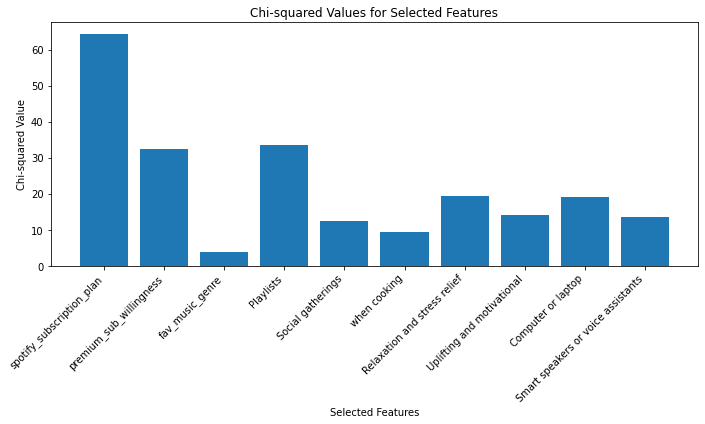

In [291]:
chi_scores = fs.scores_

# Get the chi-squared scores for selected features
selected_chi_scores = chi_scores[skb_selected_feature_indices]

# Get the names of selected features
selected_features_names = all_coded_data_dropnacol.columns[skb_selected_feature_indices]

# Plot the chi-squared scores for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_names, selected_chi_scores)
plt.xlabel('Selected Features')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [298]:
skb_selected_feature_indices = fs.get_support(indices=True)
selected_features = all_coded_data_dropna.columns[skb_selected_feature_indices]
selected_features

Index(['spotify_subscription_plan', 'premium_sub_willingness',
       'preferred_listening_content', 'Radio', 'Workout session',
       'Relaxation and stress relief', 'Sadness or melancholy',
       'Computer or laptop', 'Smart speakers or voice assistants',
       'Smartphone'],
      dtype='object')

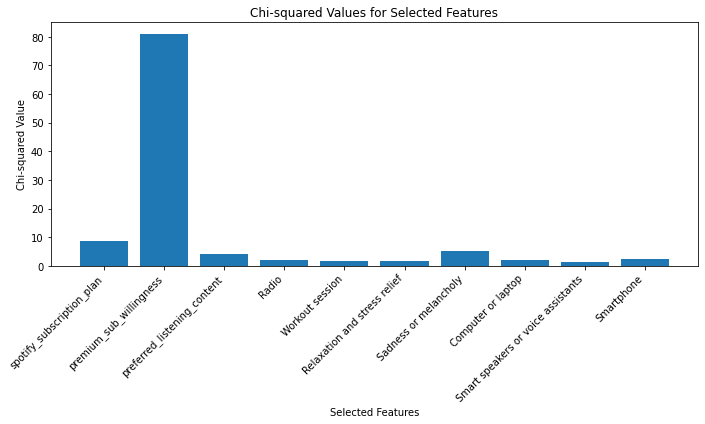

In [299]:
chi_scores = fs.scores_

# Get the chi-squared scores for selected features
selected_chi_scores = chi_scores[skb_selected_feature_indices]

# Get the names of selected features
selected_features_names = all_coded_data_dropna.columns[skb_selected_feature_indices]

# Plot the chi-squared scores for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_names, selected_chi_scores)
plt.xlabel('Selected Features')
plt.ylabel('Chi-squared Value')
plt.title('Chi-squared Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clustering

(1) Usage Case (Time, Mood, Device) difference <br> 
(2) demographic/persona difference <br>
for <br>
(A) for free, potential and paying users 
(B) music, pod users

In [130]:
print(label_mapping)

{'Age': {'12-20': 0, '20-35': 1, '35-60': 2, '6-12': 3, '60+': 4}, 'Gender': {'Female': 0, 'Male': 1, 'Others': 2}, 'spotify_usage_period': {'1 year to 2 years': 0, '6 months to 1 year': 1, 'Less than 6 months': 2, 'More than 2 years': 3}, 'spotify_subscription_plan': {'Free (ad-supported)': 0, 'Premium (paid subscription)': 1}, 'premium_sub_willingness': {'No': 0, 'Yes': 1}, 'preffered_premium_plan': {'Duo plan- Rs 149/month': 0, 'Family Plan-Rs 179/month': 1, 'Individual Plan- Rs 119/ month': 2, 'None': 3, 'Student Plan-Rs 59/month': 4}, 'preferred_listening_content': {'Music': 0, 'Podcast': 1}, 'fav_music_genre': {'All': 0, 'Classical & melody, dance': 1, 'Electronic/Dance': 2, 'Kpop': 3, 'Melody': 4, 'Old songs': 5, 'Pop': 6, 'Rap': 7, 'Rock': 8, 'classical': 9, 'trending songs random': 10}, 'music_time_slot': {'Afternoon': 0, 'Morning': 1, 'Night': 2}, 'pod_lis_frequency': {'Daily': 0, 'Never': 1, 'Once a week': 2, 'Rarely': 3, 'Several times a week': 4}, 'fav_pod_genre': {'Busine

In [131]:
data= pd.concat([label_df_encoded, dummy_df], axis=1)

In [261]:
plan_design= ['spotify_subscription_plan', 'preffered_premium_plan', 'premium_sub_willingness']
music_content= ['fav_music_genre', 'music_time_slot', 'music_recc_rating',
                'Friends', 'Others','Playlists', 'Radio', 'Search', 'Social media', 'recommendations']
listening_scenario= ['Before bed', 'Night time', 'Office hours', 'Random','Social gatherings', 'Study Hours',
                     'While Traveling','Workout session', 'leisure time', 'when cooking',
                     'Relaxation and stress relief', 'Sadness or melancholy',
                     'Social gatherings or parties', 'Uplifting and motivational',
                     'Computer or laptop', 'Smart speakers or voice assistants',
                     'Smartphone', 'Wearable devices']
pod_content=['pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format','pod_host_preference',
             'preffered_pod_duration','pod_variety_satisfaction']

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE

## Plan Cluster

In [134]:
x_plan= data[plan_design].values

In [136]:
cluster_data= copy.deepcopy(data)

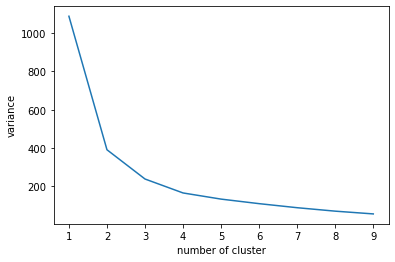

In [135]:
plan_inertias=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(x_plan)
    plan_inertias.append(kmeans.inertia_)
plt.plot(range(1,10), plan_inertias)
plt.xlabel("number of cluster")
plt.ylabel("variance")
plt.show()

In [221]:
# n_cluster=4
plan_cluster_km=KMeans(n_clusters=4,random_state=4)
plan_cluster=plan_cluster_km.fit_predict(x_plan)
cluster_data['plan_cluster']=plan_cluster

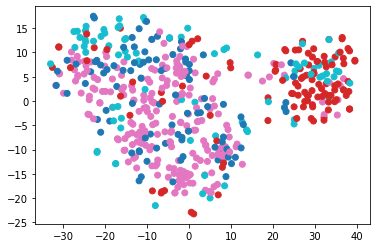

In [138]:
labels = cluster_data['plan_cluster'] # Assuming this contains labels from 0 to 6
colors = plt.cm.tab10(labels.astype(float) / max(labels))  # Adjust color map as needed

model= TSNE(learning_rate=100)
# learning rate 通常在 50 到 200 間

# only orientation is different
transformed= model.fit_transform(x)
#沒有seperate 的 fit 和 transform
#所以不能直接加入新的資料看在什麼 cluster
xs= transformed[:,0]
ys= transformed[:,1]

plt.scatter(xs,ys, c=colors) #,c=species
plt.show()

In [188]:
rev_label_dict = {lab: {v: k for k, v in label_mapping[lab].items()} for lab in label_mapping}

0
AxesSubplot(0.4219,0.125;0.1812x0.755)


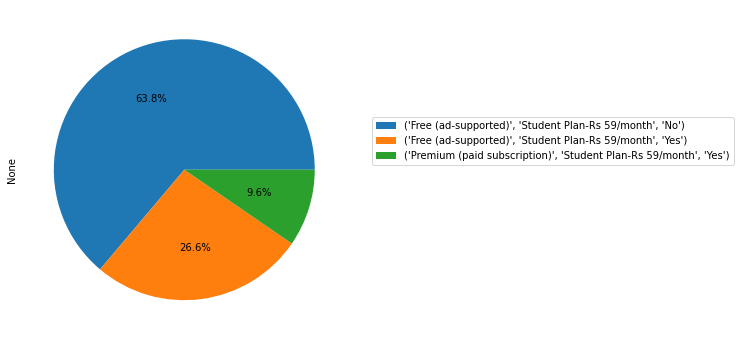

1
AxesSubplot(0.4219,0.125;0.1812x0.755)


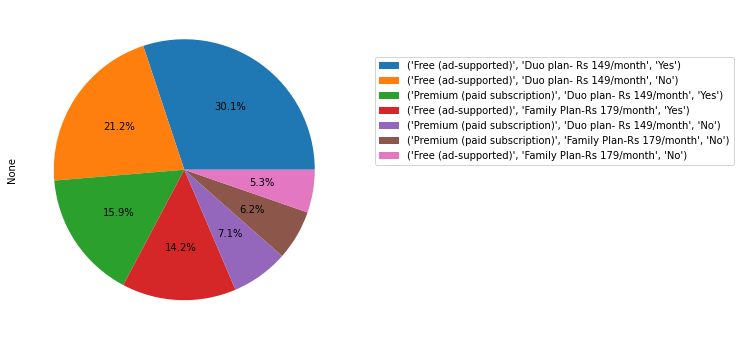

2
AxesSubplot(0.4219,0.125;0.1812x0.755)


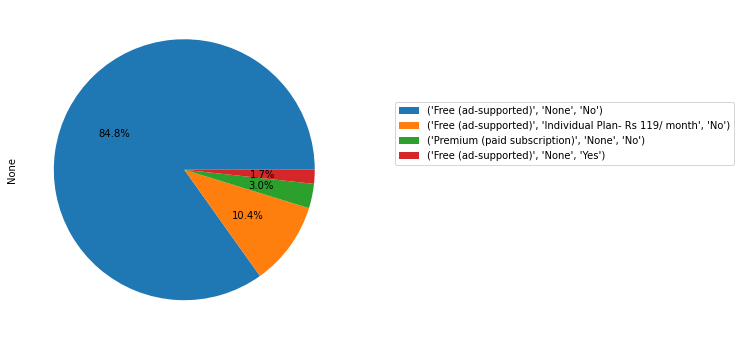

3
AxesSubplot(0.4219,0.125;0.1812x0.755)


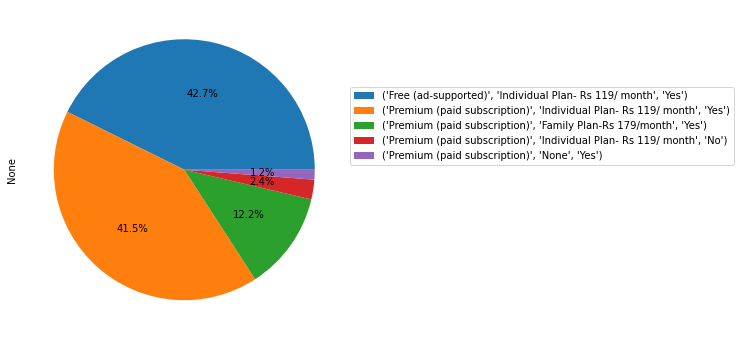

In [215]:
for cluster, content in cluster_data.groupby('plan_cluster'):
    
    print(cluster)
    df= content[plan_design]
    df= df.astype(int)

    new=pd.DataFrame()
    for col in df.columns:   
        new[col]= df[col].map(rev_label_dict[col])
    print(new.value_counts().plot.pie(labels=['']*len(new.value_counts()), autopct='%1.1f%%', figsize=(25,6)))
    plt.legend(labels=new.value_counts().index, loc='lower right', bbox_to_anchor=(2.2, 0.5))
    plt.show()
    print('==========')

➜ Cluster 0: Those who have interest in Student plan, however some might not be willing to subscribe <br> 
➜ Cluster 1: (Majority) Those who have interest in Duo/Family plan, Majority are Free plan users <br> 
➜ Cluster 2: (Majority) Free plan user that are not interested in Subscription <br> 
➜ Cluster 3: Those who have willingness to subscribe to Individual Plan or have already been paying <br> 

## Scenario Cluster

In [217]:
x_scenario= data[listening_scenario].values

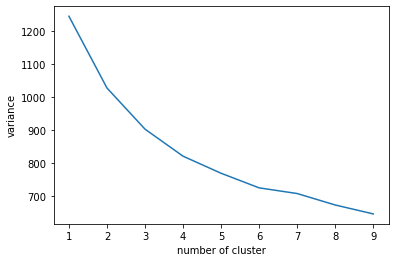

In [218]:
scenario_inertias=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(x_scenario)
    scenario_inertias.append(kmeans.inertia_)
plt.plot(range(1,10), scenario_inertias)
plt.xlabel("number of cluster")
plt.ylabel("variance")
plt.show()

In [220]:
# n_cluster=6
scenario_cluster_km=KMeans(n_clusters=6,random_state=4)
scenario_cluster=scenario_cluster_km.fit_predict(x_scenario)
cluster_data['scenario_cluster']=scenario_cluster

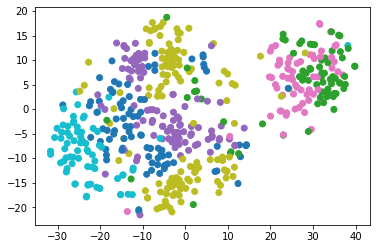

In [222]:
labels = cluster_data['scenario_cluster'] # Assuming this contains labels from 0 to 6
colors = plt.cm.tab10(labels.astype(float) / max(labels))  # Adjust color map as needed

model= TSNE(learning_rate=100)
# learning rate 通常在 50 到 200 間

# only orientation is different
transformed= model.fit_transform(x)
#沒有seperate 的 fit 和 transform
#所以不能直接加入新的資料看在什麼 cluster
xs= transformed[:,0]
ys= transformed[:,1]

plt.scatter(xs,ys, c=colors) #,c=species
plt.show()

0


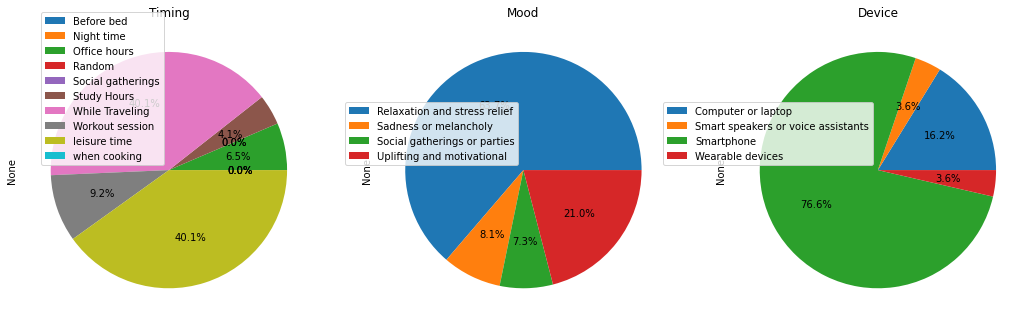

1


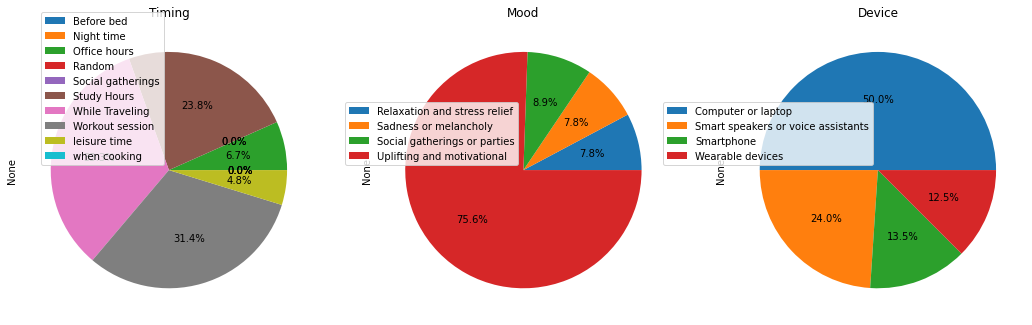

2


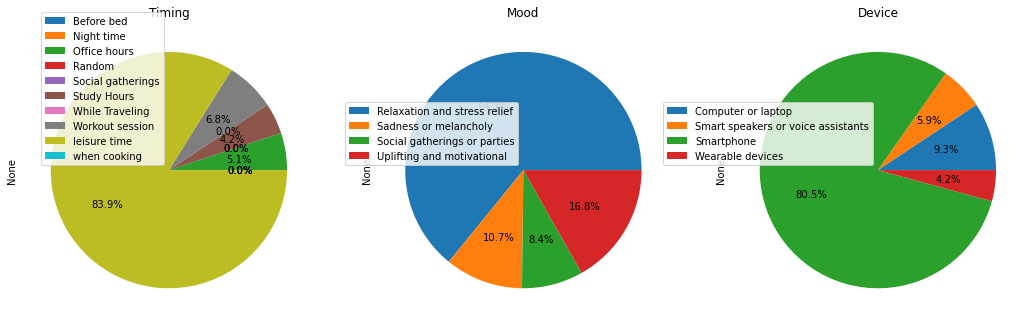

3


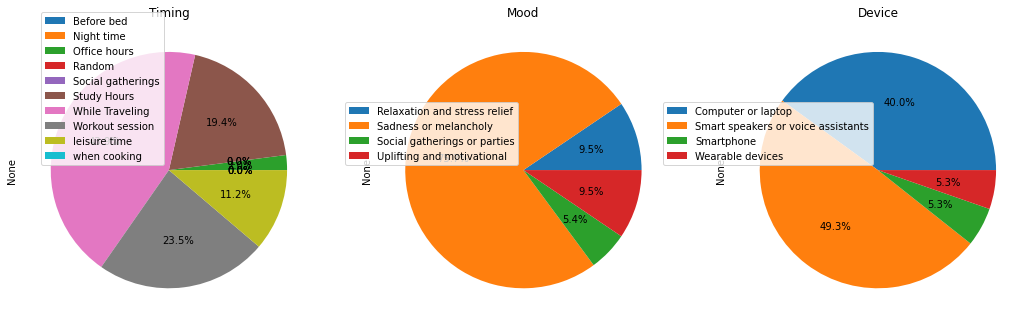

4


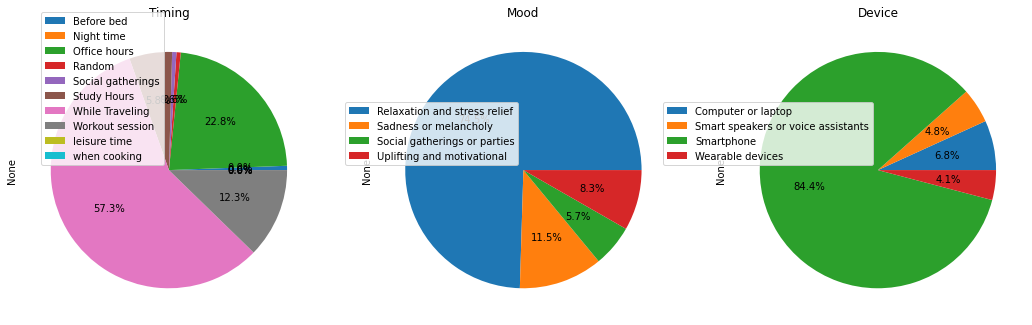

5


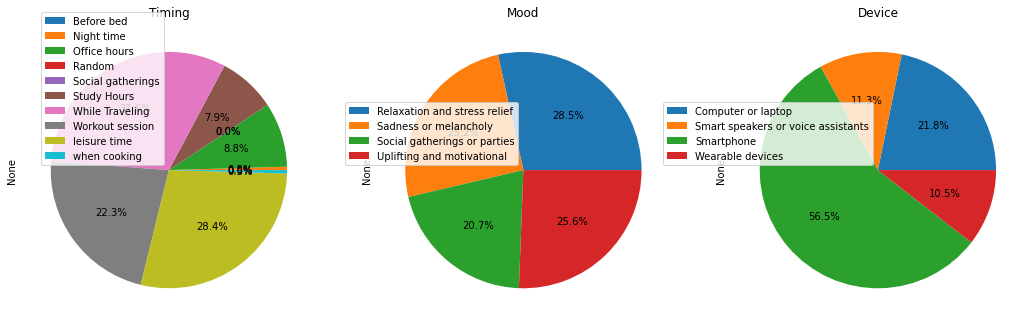

In [247]:
for cluster, content in cluster_data.groupby('scenario_cluster'):
    
    print(cluster)
    df= content[listening_scenario]
    
    timing=df.iloc[:,:10]
    mood= df.iloc[:, 10:14]
    device= df.iloc[:, 14:]
    
    all_pie_data=[timing, mood, device]
    title_list=['Timing','Mood','Device']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, pie_dta in enumerate(all_pie_data):
        pie_dta.sum().plot.pie(labels=['']*len(pie_dta.sum()), autopct='%1.1f%%', ax= axes[i])
        axes[i].legend(labels=pie_dta.sum().index, loc='lower right', bbox_to_anchor=(0.5, 0.5))
        axes[i].set_title(f'{title_list[i]}')

    plt.show()
    print('==========')

➜ <b> Cluster 0: - To Chill </b> 

    Timing: Traveling (40%), leisure time (40%), workout (9%)

    Mood: Relaxation and Stress relief (64%), uplifting and Motivational (21%)

    Device: Smartphone (77%), laptop (16%)

➜ <b> cluster 1- Functional Music </b> 

    Timing: Traveling (34%), Workout (31%), Study (24%)

    Mood: Motivational (76%)

    Device: laptop (50%)> Speak (24%)

➜ <b> cluster 2- To Calm </b> 

    Timing- Leisure time (84%)

    Mood- Relaxation and Stress relief (64%)

    Device- Smartphone (80.5%)

➜ <b> cluster 3- Along and Emotional (Healing) </b> 

    Timing- Travel (44%), Workout (24%), Study (19%)

    Mood- Sadness or melancholy (75%)

    Device- Speaker (49%), Computer (40%)

➜ <b> cluster 4- To/At Work </b> 

    Timing- Traveling (57%), Working (23%)

    Mood- Relaxation and stress relief

    Device- Smartphone  (84%)

➜ <b> cluster 5- Random </b> 

    Timing- Traveling, leisure, workout, office

    Mood- Evenly…

    Device: Smartphone (57%), Computer (22%)

## Music Cluster

In [262]:
x_msuic= data[music_content].values

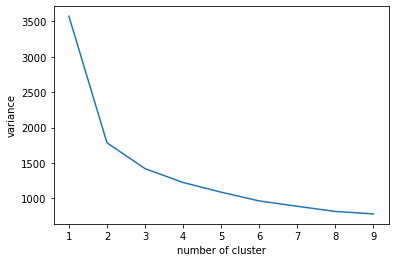

In [263]:
music_inertias=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(x_msuic)
    music_inertias.append(kmeans.inertia_)
plt.plot(range(1,10), music_inertias)
plt.xlabel("number of cluster")
plt.ylabel("variance")
plt.show()

In [265]:
# n_cluster=3
music_cluster_km=KMeans(n_clusters=2,random_state=4)
music_cluster=music_cluster_km.fit_predict(x_msuic)
cluster_data['music_cluster']=music_cluster

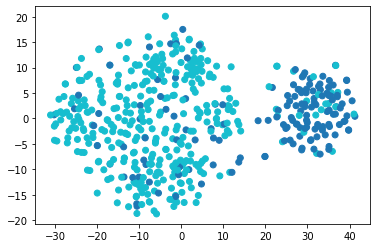

In [266]:
labels = cluster_data['music_cluster'] # Assuming this contains labels from 0 to 6
colors = plt.cm.tab10(labels.astype(float) / max(labels))  # Adjust color map as needed

model= TSNE(learning_rate=100)
# learning rate 通常在 50 到 200 間

# only orientation is different
transformed= model.fit_transform(x)
#沒有seperate 的 fit 和 transform
#所以不能直接加入新的資料看在什麼 cluster
xs= transformed[:,0]
ys= transformed[:,1]

plt.scatter(xs,ys, c=colors) #,c=species
plt.show()

In [267]:
for cluster, content in cluster_data.groupby('music_cluster'):
    
    print(cluster)
    df= content[music_content]

0
1


In [268]:
df

fav_music_genre  music_time_slot  music_recc_rating  Friends  Others  \
0                  4                2                  3        0       0   
2                  6                2                  4        0       0   
3                  4                2                  4        0       0   
4                  4                2                  4        0       0   
5                  6                2                  3        0       1   
..               ...              ...                ...      ...     ...   
515                6                1                  5        0       0   
516                6                2                  2        0       1   
517                6                2                  3        0       0   
518                4                2                  2        0       1   
519                6                2                  3        0       0   

     Playlists  Radio  Search  Social media  recommendations  
0            1      0       0             0                0  
2            1      0       0             0                0  
3            1      0       0             0                1  
4            1      0       0             0                1  
5            0      0       0             0                0  
..         ...    ...     ...           ...              ...  
515          0      0       0             0                1  
516          0      0       0             0                0  
517          0      0       0             0                1  
518          0      0       0             0                1  
519          1      1       0             0                0  

[366 rows x 10 columns]

<AxesSubplot:ylabel='None'>

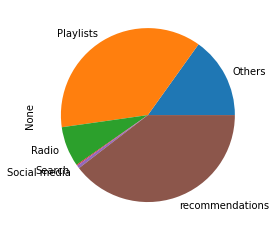

In [269]:
exploration= df.iloc[:,4:]
exploration.sum().plot.pie()

In [272]:
rev_label_dict

{'Age': {0: '12-20', 1: '20-35', 2: '35-60', 3: '6-12', 4: '60+'},
 'Gender': {0: 'Female', 1: 'Male', 2: 'Others'},
 'spotify_usage_period': {0: '1 year to 2 years',
  1: '6 months to 1 year',
  2: 'Less than 6 months',
  3: 'More than 2 years'},
 'spotify_subscription_plan': {0: 'Free (ad-supported)',
  1: 'Premium (paid subscription)'},
 'premium_sub_willingness': {0: 'No', 1: 'Yes'},
 'preffered_premium_plan': {0: 'Duo plan- Rs 149/month',
  1: 'Family Plan-Rs 179/month',
  2: 'Individual Plan- Rs 119/ month',
  3: 'None',
  4: 'Student Plan-Rs 59/month'},
 'preferred_listening_content': {0: 'Music', 1: 'Podcast'},
 'fav_music_genre': {0: 'All',
  1: 'Classical & melody, dance',
  2: 'Electronic/Dance',
  3: 'Kpop',
  4: 'Melody',
  5: 'Old songs',
  6: 'Pop',
  7: 'Rap',
  8: 'Rock',
  9: 'classical',
  10: 'trending songs random'},
 'music_time_slot': {0: 'Afternoon', 1: 'Morning', 2: 'Night'},
 'pod_lis_frequency': {0: 'Daily',
  1: 'Never',
  2: 'Once a week',
  3: 'Rarely',
  

In [274]:
df['music_recc_rating'].value_counts()

3    68
2    39
4    35
1     6
5     6
Name: music_recc_rating, dtype: int64

In [275]:
rev_label_dict['music_recc_rating']={
    1: '1', 2: '2', 3: '3', 4: '4', 5: '5'   
}

<AxesSubplot:ylabel='fav_music_genre'>

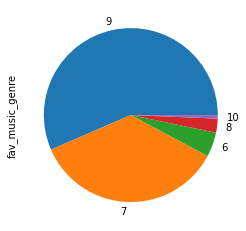

In [284]:
fav_genre.value_counts().plot.pie()

0


IndexError: index 3 is out of bounds for axis 0 with size 3

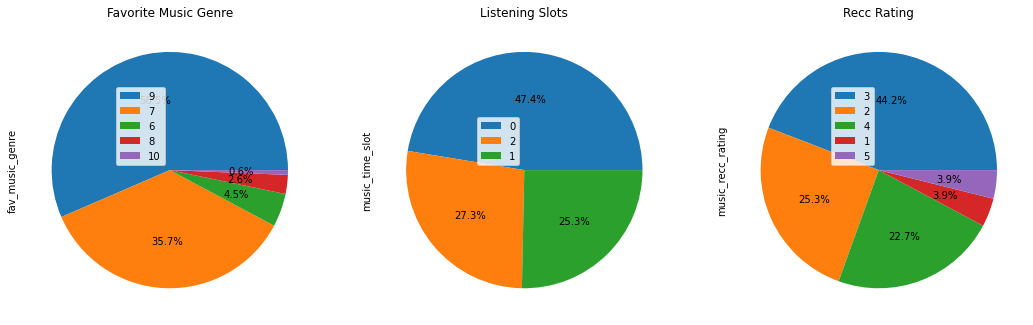

In [286]:
for cluster, content in cluster_data.groupby('music_cluster'):
    
    print(cluster)
    df_all= content[music_content]
    df_all= df_all.astype(int)
    
    df= df_all.iloc[:,:3]
    exploration= df.iloc[:,4:]
    
    fav_genre=df.iloc[:,0]
    slot= df.iloc[:, 1]
    rating= df.iloc[:, 2]
    
    all_pie_data=[fav_genre, slot, rating, exploration]
    title_list=['Favorite Music Genre','Listening Slots','Recc Rating', 'Exploration Method']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, pie_dta in enumerate(all_pie_data):
        if i==3: 
            pie_dta.sum().plot.pie(labels=['']*len(pie_dta.sum()), autopct='%1.1f%%', ax= axes[i])
            axes[i].legend(labels=pie_dta.sum().index, loc='lower right', bbox_to_anchor=(0.5, 0.5))
            axes[i].set_title(f'{title_list[i]}')
        else:
            pie_dta.value_counts().plot.pie(labels=['']*len(pie_dta.value_counts()), autopct='%1.1f%%', ax= axes[i])
            axes[i].legend(labels= pie_dta.value_counts().index, loc='lower right', bbox_to_anchor=(0.5, 0.5))
            axes[i].set_title(f'{title_list[i]}')
    plt.show()
    print('==========')

In [277]:
df

fav_music_genre  music_time_slot  music_recc_rating
0                  4                2                  3
2                  6                2                  4
3                  4                2                  4
4                  4                2                  4
5                  6                2                  3
..               ...              ...                ...
515                6                1                  5
516                6                2                  2
517                6                2                  3
518                4                2                  2
519                6                2                  3

[366 rows x 3 columns]

0
AxesSubplot(0.4219,0.125;0.1812x0.755)


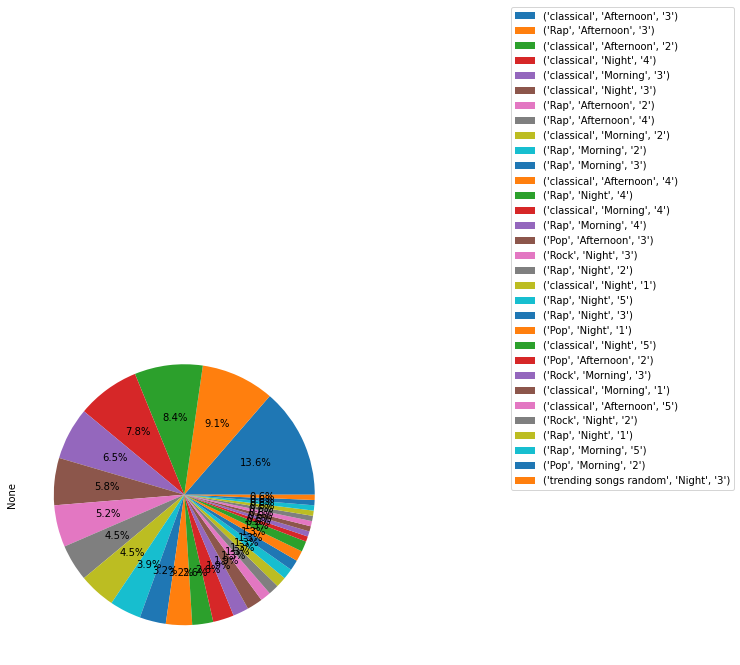

1
AxesSubplot(0.4219,0.125;0.1812x0.755)


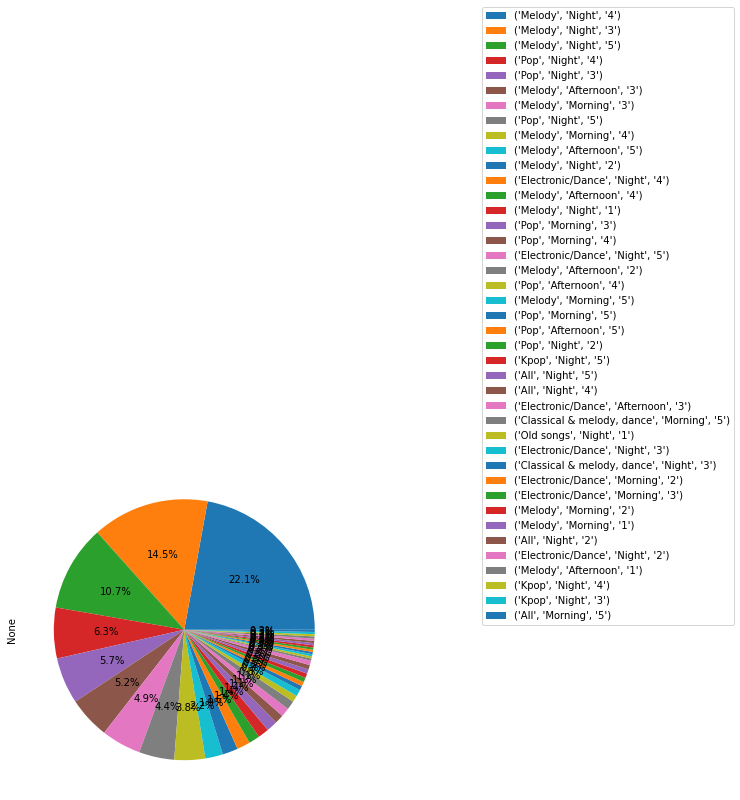

In [276]:
for cluster, content in cluster_data.groupby('music_cluster'):
    
    print(cluster)
    df_all= content[music_content]
    df_all= df_all.astype(int)
    
    df= df_all.iloc[:,:3]
    exploration= df.iloc[:,4:]

    new=pd.DataFrame()
    for col in df.columns:   
        new[col]= df[col].map(rev_label_dict[col])
    print(new.value_counts().plot.pie(labels=['']*len(new.value_counts()), autopct='%1.1f%%', figsize=(25,6)))
    plt.legend(labels=new.value_counts().index, loc='lower right', bbox_to_anchor=(2.2, 0.5))
    plt.show()
    print('==========')

0


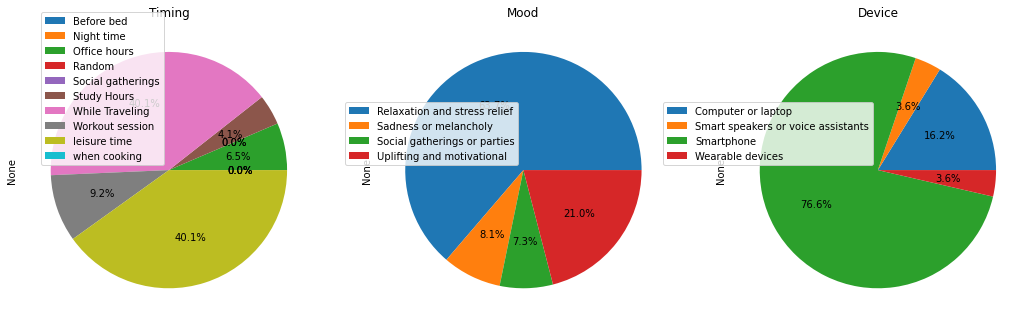

1


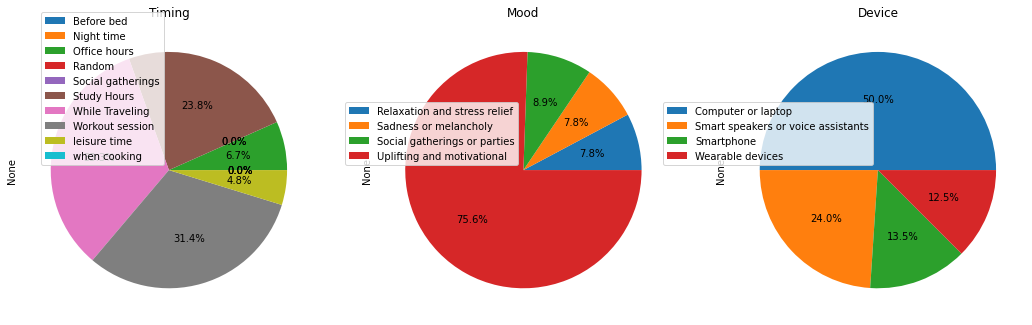

2


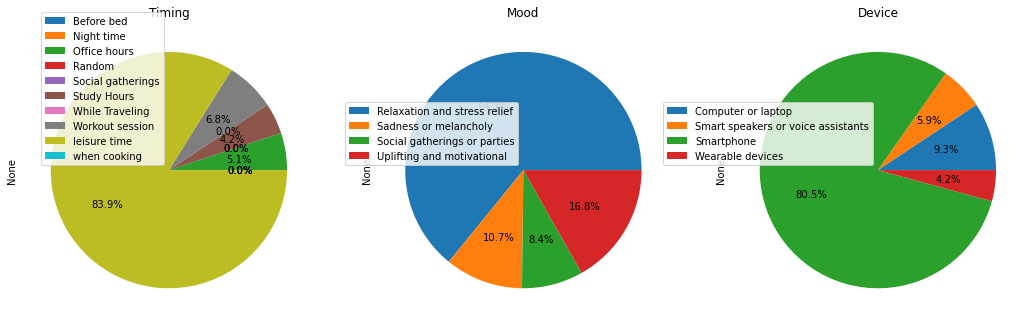

3


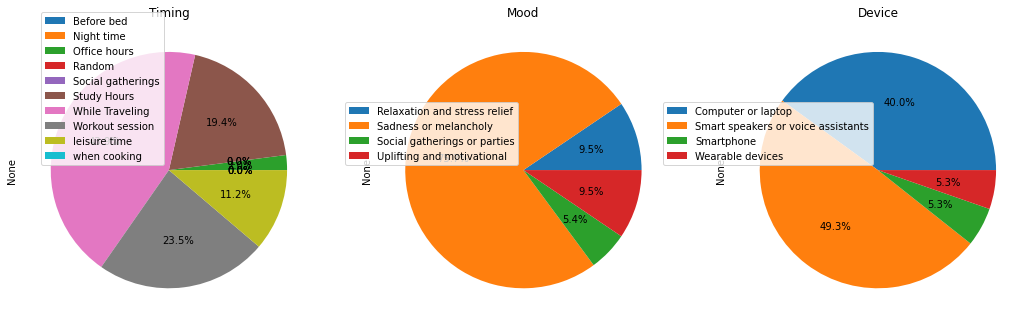

4


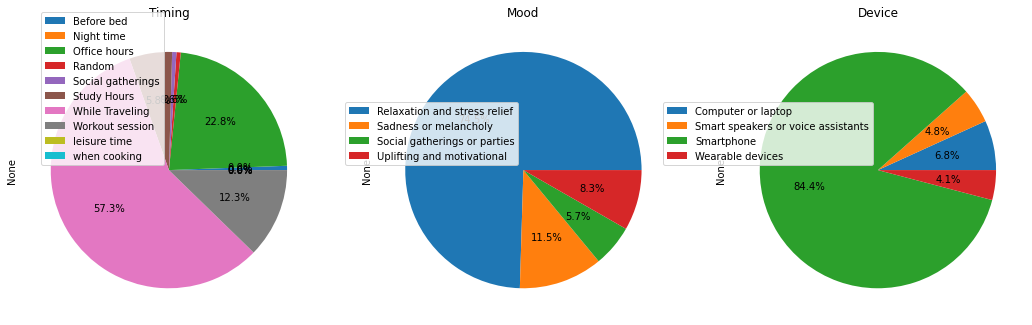

5


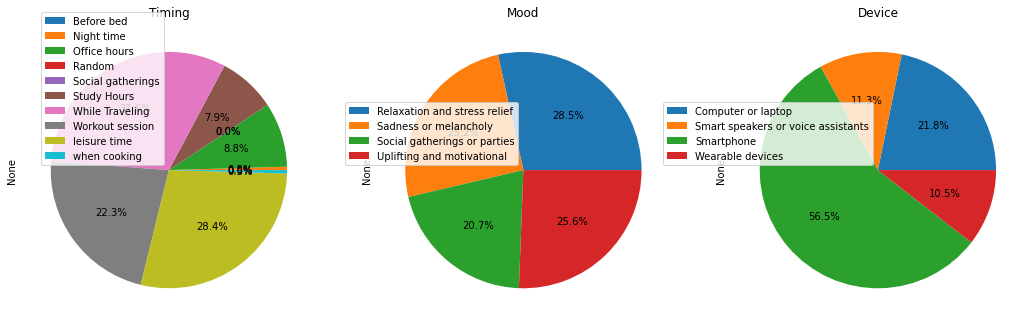

In [247]:
for cluster, content in cluster_data.groupby('scenario_cluster'):
    
    print(cluster)
    df= content[listening_scenario]
    
    timing=df.iloc[:,:10]
    mood= df.iloc[:, 10:14]
    device= df.iloc[:, 14:]
    
    all_pie_data=[timing, mood, device]
    title_list=['Timing','Mood','Device']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, pie_dta in enumerate(all_pie_data):
        pie_dta.sum().plot.pie(labels=['']*len(pie_dta.sum()), autopct='%1.1f%%', ax= axes[i])
        axes[i].legend(labels=pie_dta.sum().index, loc='lower right', bbox_to_anchor=(0.5, 0.5))
        axes[i].set_title(f'{title_list[i]}')

    plt.show()
    print('==========')

➜ <b> Cluster 0: - To Chill </b> 

    Timing: Traveling (40%), leisure time (40%), workout (9%)

    Mood: Relaxation and Stress relief (64%), uplifting and Motivational (21%)

    Device: Smartphone (77%), laptop (16%)

➜ <b> cluster 1- Functional Music </b> 

    Timing: Traveling (34%), Workout (31%), Study (24%)

    Mood: Motivational (76%)

    Device: laptop (50%)> Speak (24%)

➜ <b> cluster 2- To Calm </b> 

    Timing- Leisure time (84%)

    Mood- Relaxation and Stress relief (64%)

    Device- Smartphone (80.5%)

➜ <b> cluster 3- Along and Emotional (Healing) </b> 

    Timing- Travel (44%), Workout (24%), Study (19%)

    Mood- Sadness or melancholy (75%)

    Device- Speaker (49%), Computer (40%)

➜ <b> cluster 4- To/At Work </b> 

    Timing- Traveling (57%), Working (23%)

    Mood- Relaxation and stress relief

    Device- Smartphone  (84%)

➜ <b> cluster 5- Random </b> 

    Timing- Traveling, leisure, workout, office

    Mood- Evenly…

    Device: Smartphone (57%), Computer (22%)

## Pod Cluster

In [123]:
cluster_profiles = {}
for cluster, content in cluster_user_coded_data.groupby('plan_cluster'):
    cluster_value_counts = {}
    for column in content:
        value_counts = cluster_data[column].value_counts()
        print(cluster, value_counts)
        cluster_value_counts[column] = value_counts
    cluster_profiles[cluster_label] = pd.DataFrame(cluster_value_counts)

0 0.25    21
0.00     5
0.50     3
1.00     1
Name: Age, dtype: int64
0 0.0    23
0.5     5
1.0     2
Name: Gender, dtype: int64
0 0.333333    11
0.000000     9
1.000000     8
0.666667     2
Name: spotify_usage_period, dtype: int64
0 0.0    30
Name: spotify_subscription_plan, dtype: int64
0 0.0    30
Name: premium_sub_willingness, dtype: int64
0 0.00    24
0.25     6
Name: preffered_premium_plan, dtype: int64
0 0.0    19
1.0    11
Name: preferred_listening_content, dtype: int64
0 0.4    12
0.9    11
0.7     4
0.0     1
0.6     1
0.2     1
Name: fav_music_genre, dtype: int64
0 0.0    14
1.0    11
0.5     5
Name: music_time_slot, dtype: int64
0 0.75    14
0.50     8
1.00     7
0.00     1
Name: pod_lis_frequency, dtype: int64
0 0.421053    9
0.052632    7
0.894737    5
0.526316    4
0.631579    3
0.315789    1
0.789474    1
Name: fav_pod_genre, dtype: int64
0 1.00    12
0.00     8
0.50     7
0.75     2
0.25     1
Name: preffered_pod_format, dtype: int64
0 0.000000    15
1.000000    10
0.3

4 0.25    21
0.00     5
0.50     3
1.00     1
Name: Age, dtype: int64
4 0.0    23
0.5     5
1.0     2
Name: Gender, dtype: int64
4 0.333333    11
0.000000     9
1.000000     8
0.666667     2
Name: spotify_usage_period, dtype: int64
4 0.0    30
Name: spotify_subscription_plan, dtype: int64
4 0.0    30
Name: premium_sub_willingness, dtype: int64
4 0.00    24
0.25     6
Name: preffered_premium_plan, dtype: int64
4 0.0    19
1.0    11
Name: preferred_listening_content, dtype: int64
4 0.4    12
0.9    11
0.7     4
0.0     1
0.6     1
0.2     1
Name: fav_music_genre, dtype: int64
4 0.0    14
1.0    11
0.5     5
Name: music_time_slot, dtype: int64
4 0.75    14
0.50     8
1.00     7
0.00     1
Name: pod_lis_frequency, dtype: int64
4 0.421053    9
0.052632    7
0.894737    5
0.526316    4
0.631579    3
0.315789    1
0.789474    1
Name: fav_pod_genre, dtype: int64
4 1.00    12
0.00     8
0.50     7
0.75     2
0.25     1
Name: preffered_pod_format, dtype: int64
4 0.000000    15
1.000000    10
0.3

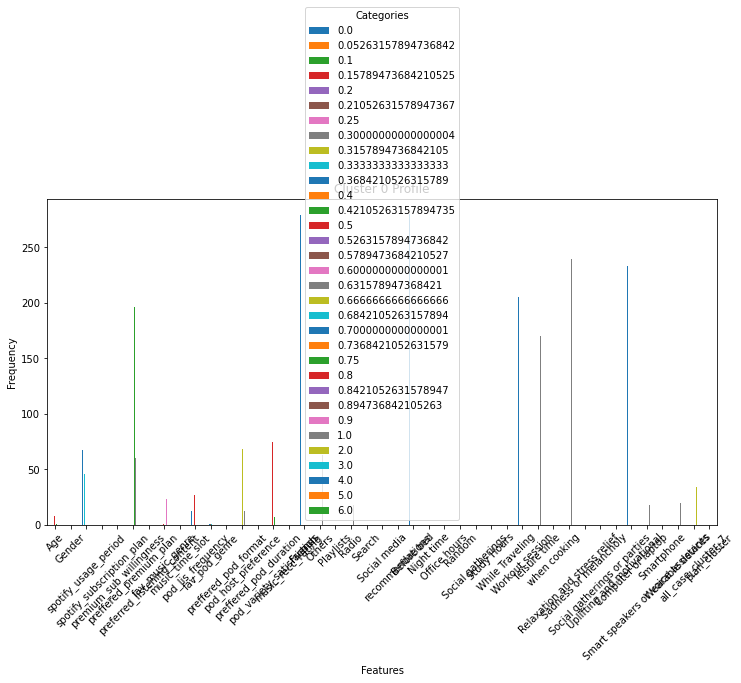

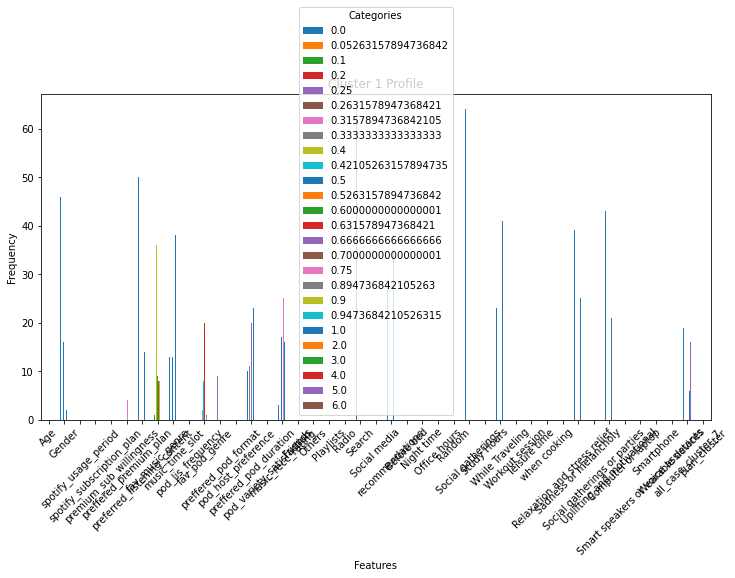

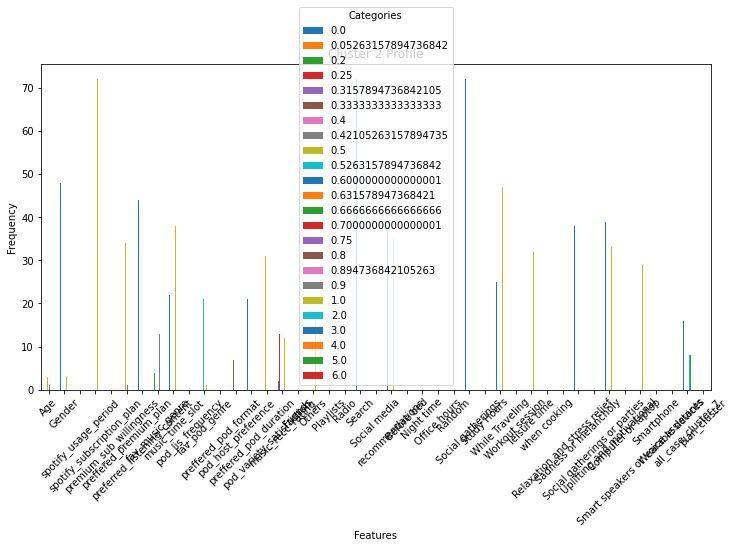

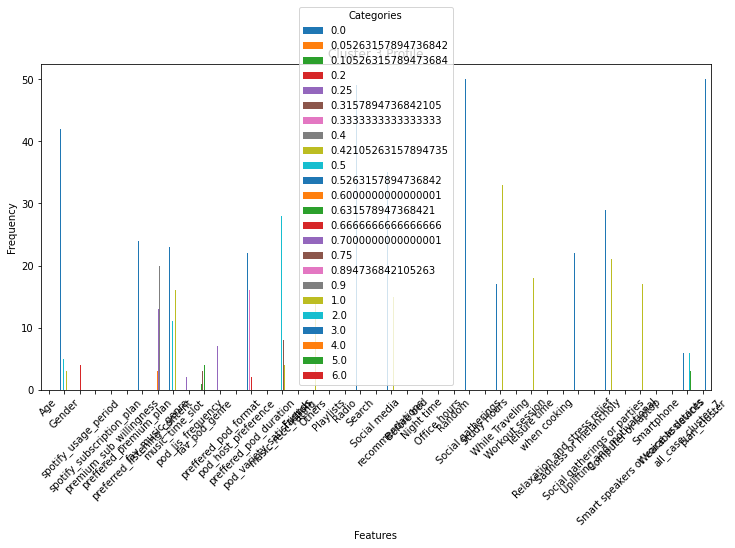

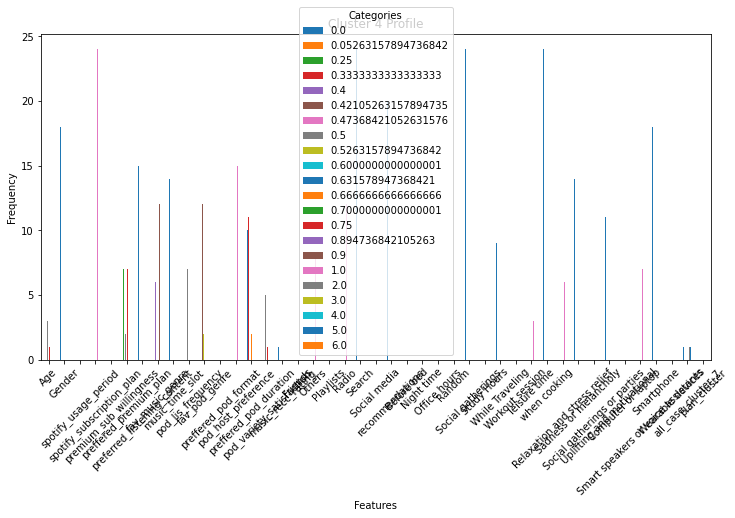

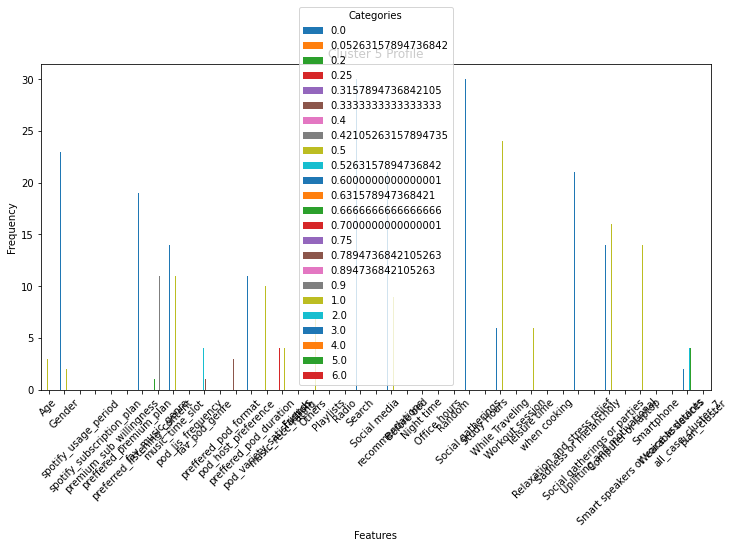

In [117]:
data= cluster_user_coded_data
cluster_labels= cluster_user_coded_data['plan_cluster']

cluster_profiles = {}

for cluster_label in set(cluster_labels):
    cluster_data = data[cluster_labels == cluster_label]
    cluster_value_counts = {}
    for column in data.columns:
        value_counts = cluster_data[column].value_counts()
        cluster_value_counts[column] = value_counts
    cluster_profiles[cluster_label] = pd.DataFrame(cluster_value_counts)

# Plotting cluster profiles
for cluster_label, profile in cluster_profiles.items():
    profile.T.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Cluster {cluster_label} Profile')
    plt.xlabel('Features')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend(title='Categories')
    plt.show()


In [ ]:
cluster_profiles = {}

for cluster_label in set(cluster_labels):
    cluster_data = data[cluster_labels == cluster_label]
    cluster_value_counts = {}
    for column in data.columns:
        value_counts = cluster_data[column].value_counts()
        cluster_value_counts[column] = value_counts
    cluster_user_data[cluster_label] = pd.DataFrame(cluster_value_counts)

# Plotting cluster profiles
for cluster_label, profile in cluster_profiles.items():
    profile.T.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Cluster {cluster_label} Profile')
    plt.xlabel('Features')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend(title='Categories')
    plt.show()


In [114]:
cluster_user_data=copy.deepcopy(user_data)
cluster_user_coded_data= copy.deepcopy(all_coded_data)

In [66]:
x= all_coded_data.values

In [67]:
inertias=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,10), inertias)
plt.xlabel("number of cluster")
plt.ylabel("variance")
plt.show()

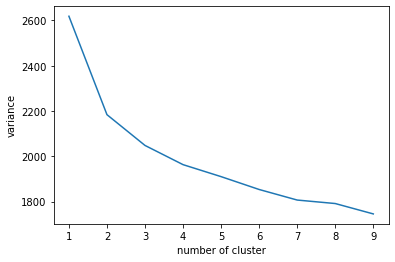

In [68]:
plt.plot(range(1,10), inertias)
plt.xlabel("number of cluster")
plt.ylabel("variance")
plt.show()

In [72]:
all_cluster_km=KMeans(n_clusters=7,random_state=4)
allcluster_kmeans=all_cluster_km.fit_predict(X)

In [71]:
all_coded_data['all_case_cluster_7']=allcluster_kmeans

In [102]:
plan_design= ['spotify_subscription_plan', 'preffered_premium_plan', 'premium_sub_willingness']
music_content= ['preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_recc_rating',
                'Friends', 'Others','Playlists', 'Radio', 'Search', 'Social media', 'recommendations']
listening_scenario= ['Before bed', 'Night time', 'Office hours', 'Random','Social gatherings', 'Study Hours',
                     'While Traveling','Workout session', 'leisure time', 'when cooking',
                     'Relaxation and stress relief', 'Sadness or melancholy',
                     'Social gatherings or parties', 'Uplifting and motivational',
                     'Computer or laptop', 'Smart speakers or voice assistants',
                     'Smartphone', 'Wearable devices']
pod_content=['pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format','pod_host_preference',
             'preffered_pod_duration','pod_variety_satisfaction']

In [103]:
x_plan= all_coded_data[plan_design].values
x_music= all_coded_data[music_content].values
x_pod= all_coded_data[pod_content].values
x_scenario= all_coded_data[listening_scenario].values

## All Cluster

In [ ]:
all_cluster_km=KMeans(n_clusters=7,random_state=4)
allcluster_kmeans=all_cluster_km.fit_predict(X)

In [76]:
from sklearn.manifold import TSNE

In [ ]:
x= all_coded_data.values

In [80]:
all_coded_data['all_case_cluster_7']

0      5
1      4
2      2
3      2
4      0
      ..
515    3
516    5
517    0
518    5
519    2
Name: all_case_cluster_7, Length: 520, dtype: int32

In [82]:
labels = all_coded_data['all_case_cluster_7']  # Assuming this contains labels from 0 to 6
colors = plt.cm.tab10(labels.astype(float) / max(labels))  # Adjust color map as needed

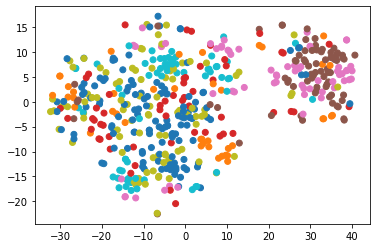

In [83]:
model= TSNE(learning_rate=100)
# learning rate 通常在 50 到 200 間

# only orientation is different
transformed= model.fit_transform(x)
#沒有seperate 的 fit 和 transform
#所以不能直接加入新的資料看在什麼 cluster
xs= transformed[:,0]
ys= transformed[:,1]

plt.scatter(xs,ys, c=colors) #,c=species
plt.show()

In [84]:
labels = all_coded_data['premium_sub_willingness']  # Assuming this contains labels from 0 to 6
colors = plt.cm.tab10(labels.astype(float) / max(labels))  # Adjust color map as needed

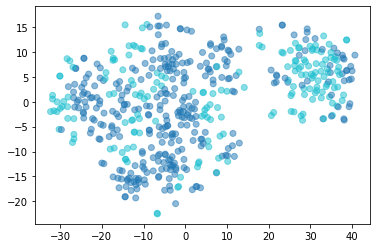

In [92]:
plt.scatter(xs,ys, alpha=0.5, c=colors) #,c=species
plt.show()

In [ ]:
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)

In [88]:
from scipy.cluster.hierarchy import linkage, dendrogram

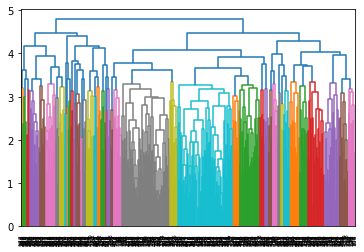

In [91]:
merging= linkage(x, method="complete")
dendrogram(merging, 
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

In [94]:
user_data.head()

Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No                            None   
4                      No                            None   

  preferred_listening_content fav_music_genre music_time_slot  \
0                     Podcast          Melody           Night   
1                     Podcast             Rap       Afternoon   
2                     Podcast             Pop           Night   
3                       Music          Melody           Night   
4                       Music          Melody           Night   

                              music_Influencial_mood  \
0                              Sadness or melancholy   
1                       Social gatherings or parties   
2                       Relaxation and stress relief   
3  Relaxation and stress relief, Social gathering...   
4                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                  None   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                   None   
2            Interview                    None                   Both   
3                 None                    None                   None   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

In [ ]:
user_data['7_clusters']=all_coded_data['all_case_cluster_7'] #= labels
numeric_cols= ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g']
stat_penguins=penguins_clean.groupby('cluster')[numeric_cols].mean()
print(stat_penguins)

In [100]:
stat_spotify_user_type= all_coded_data.groupby('all_case_cluster_7').apply(lambda x: x.value_counts())
print(stat_spotify_user_type)

all_case_cluster_7  Age   Gender  spotify_usage_period  spotify_subscription_plan  premium_sub_willingness  preffered_premium_plan  preferred_listening_content  fav_music_genre  music_time_slot  pod_lis_frequency  fav_pod_genre  preffered_pod_format  pod_host_preference  preffered_pod_duration  pod_variety_satisfaction  music_recc_rating  Friends  Others  Playlists  Radio  Search  Social media  recommendations  Before bed  Night time  Office hours  Random  Social gatherings  Study Hours  While Traveling  Workout session  leisure time  when cooking  Relaxation and stress relief  Sadness or melancholy  Social gatherings or parties  Uplifting and motivational  Computer or laptop  Smart speakers or voice assistants  Smartphone  Wearable devices  all_case_cluster_7
0                   0.25  0.0     0.000000              0.0                        0.0                      0.75                    0.0                          0.4              1.0              0.25               0.631579       

In [98]:
all_coded_data['all_case_cluster_7'].value_counts()

0    129
5     93
3     73
6     67
4     60
2     56
1     42
Name: all_case_cluster_7, dtype: int64

In [167]:
kf= KFold(n_splits=5, random_state=42, shuffle=True)
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.6923076923076923


In [24]:
import matplotlib.pyplot as plt

[-0.          0.          0.          0.29317065 -0.26319681  0.08096645
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.06549265 -0.          0.          0.          0.01141953
  0.          0.         -0.00505974 -0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.05912227  0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.03660679 -0.         -0.
 -0.          0.09877608 -0.         -0.          0.          0.
 -0.          0.          0.         -0.07488652  0.        ]


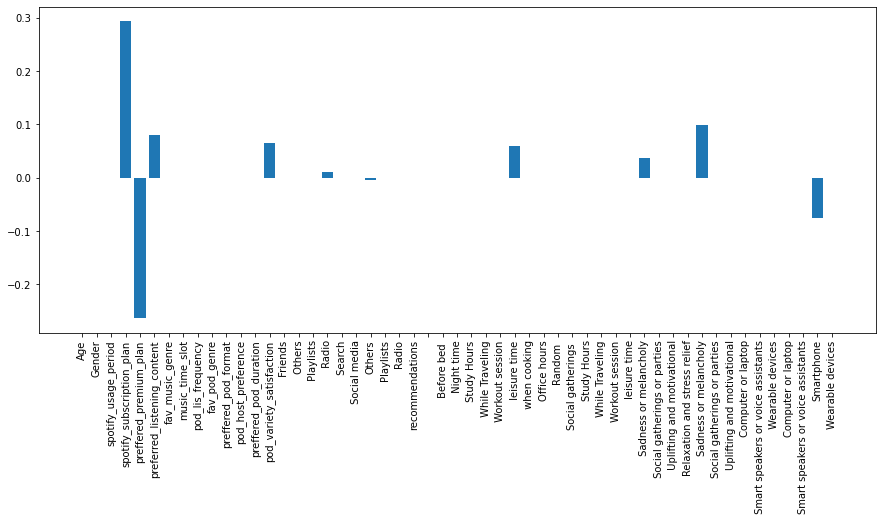

In [26]:
lasso=Lasso(alpha=0.01)
lasso_coef= lasso.fit(X_df, Y_df).coef_


print(lasso_coef)
plt.figure(figsize=(15, 6))
plt.bar(X_df.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [28]:
label_df_NA = label_df.applymap(lambda x: None if x == 'None' else x)
#label_df_noNA= user_data_NA.dropna()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [30]:
category_mask= label_df_NA.dtypes==object
category_columns = label_df_NA.columns[category_mask].tolist()

na_label_df_encoded=pd.DataFrame()
#label_mapping={}

for col in category_columns:
    le= LabelEncoder()
    
    na_label_df_encoded[col]=le.fit_transform(label_df_NA[col])
    #label_mapping[col]= dict(zip(le.classes_, range(len(le.classes_))))

In [31]:
label_df_NA_x= na_label_df_encoded.drop('premium_sub_willingness', axis=1)
label_df_NA_y= na_label_df_encoded['premium_sub_willingness']

In [42]:
label_df_noNA= label_df_NA.dropna()
category_mask= label_df_noNA.dtypes==object
category_columns = label_df_noNA.columns[category_mask].tolist()

na_label_df_encoded=pd.DataFrame()
#label_mapping={}

for col in category_columns:
    le= LabelEncoder()
    
    na_label_df_encoded[col]=le.fit_transform(label_df_noNA[col])
    #label_mapping[col]= dict(zip(le.classes_, range(len(le.classes_))))

In [43]:
na_label_df_encoded_dropna= na_label_df_encoded.dropna()
label_df_NA_x_dropna= na_label_df_encoded_dropna.drop('premium_sub_willingness', axis=1)
label_df_NA_y_dropna= na_label_df_encoded_dropna['premium_sub_willingness']

In [47]:
#scaled_data
X_train, X_test, y_train, y_test= train_test_split(label_df_NA_x_dropna, label_df_NA_y_dropna,
                                                   test_size= 0.2, random_state=42, stratify=label_df_NA_y_dropna)

In [48]:
kf= KFold(n_splits=5, random_state=42, shuffle=True)
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.6444444444444445


In [54]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Add AdaBoost
}

In [56]:
# Loop over each classifier
for clf_name, clf in classifiers.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Make predictions
    pred = clf.predict(X_test)
    # Compute accuracy using the test data
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy score for {clf_name}: {accuracy}")

Cross-validation scores for Logistic Regression: [-0.44444444 -0.41666667 -0.33333333 -0.5        -0.37142857]
Accuracy score for Logistic Regression: 0.6444444444444445
Cross-validation scores for Random Forest: [-0.33333333 -0.44444444 -0.30555556 -0.33333333 -0.31428571]
Accuracy score for Random Forest: 0.6888888888888889
Cross-validation scores for Gradient Boosting: [-0.36111111 -0.47222222 -0.33333333 -0.38888889 -0.31428571]
Accuracy score for Gradient Boosting: 0.5555555555555556
Cross-validation scores for Decision Tree: [-0.41666667 -0.38888889 -0.38888889 -0.5        -0.45714286]
Accuracy score for Decision Tree: 0.5777777777777777
Cross-validation scores for XGBoost: [-0.36111111 -0.5        -0.38888889 -0.47222222 -0.31428571]
Accuracy score for XGBoost: 0.5777777777777777
Cross-validation scores for AdaBoost: [-0.47222222 -0.33333333 -0.38888889 -0.41666667 -0.37142857]
Accuracy score for AdaBoost: 0.6


[-0.08429093  0.          0.          0.18228712 -0.02976347  0.09818524
 -0.01462992  0.         -0.03578166  0.0005379   0.          0.
 -0.          0.05022834]


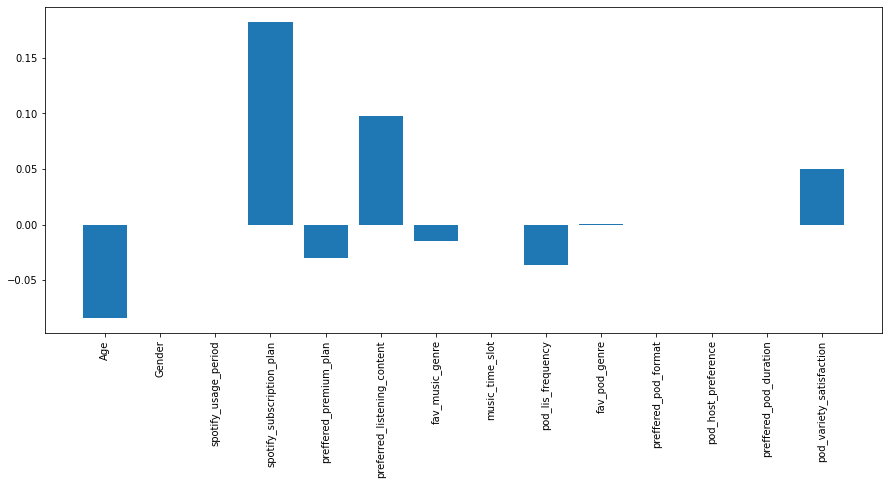

In [49]:
lasso=Lasso(alpha=0.01)
lasso_coef= lasso.fit(label_df_NA_x_dropna, label_df_NA_y_dropna).coef_


print(lasso_coef)
plt.figure(figsize=(15, 6))
plt.bar(label_df_NA_x_dropna.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

➜ after dropping "none" from the data, the training accuracy decrease. it might be due to lacking of sufficient training data. (from 520 to 224 data)

In [33]:
kf= KFold(n_splits=5, random_state=42, shuffle=True)
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.7115384615384616


➜ 

In [167]:
kf= KFold(n_splits=5, random_state=42, shuffle=True)
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.6923076923076923


In [23]:
from sklearn.linear_model import Lasso

In [24]:
import matplotlib.pyplot as plt

In [36]:
label_df_NA_x.shape

(520, 14)

# Trying out for Data Manipulation

<AxesSubplot:>

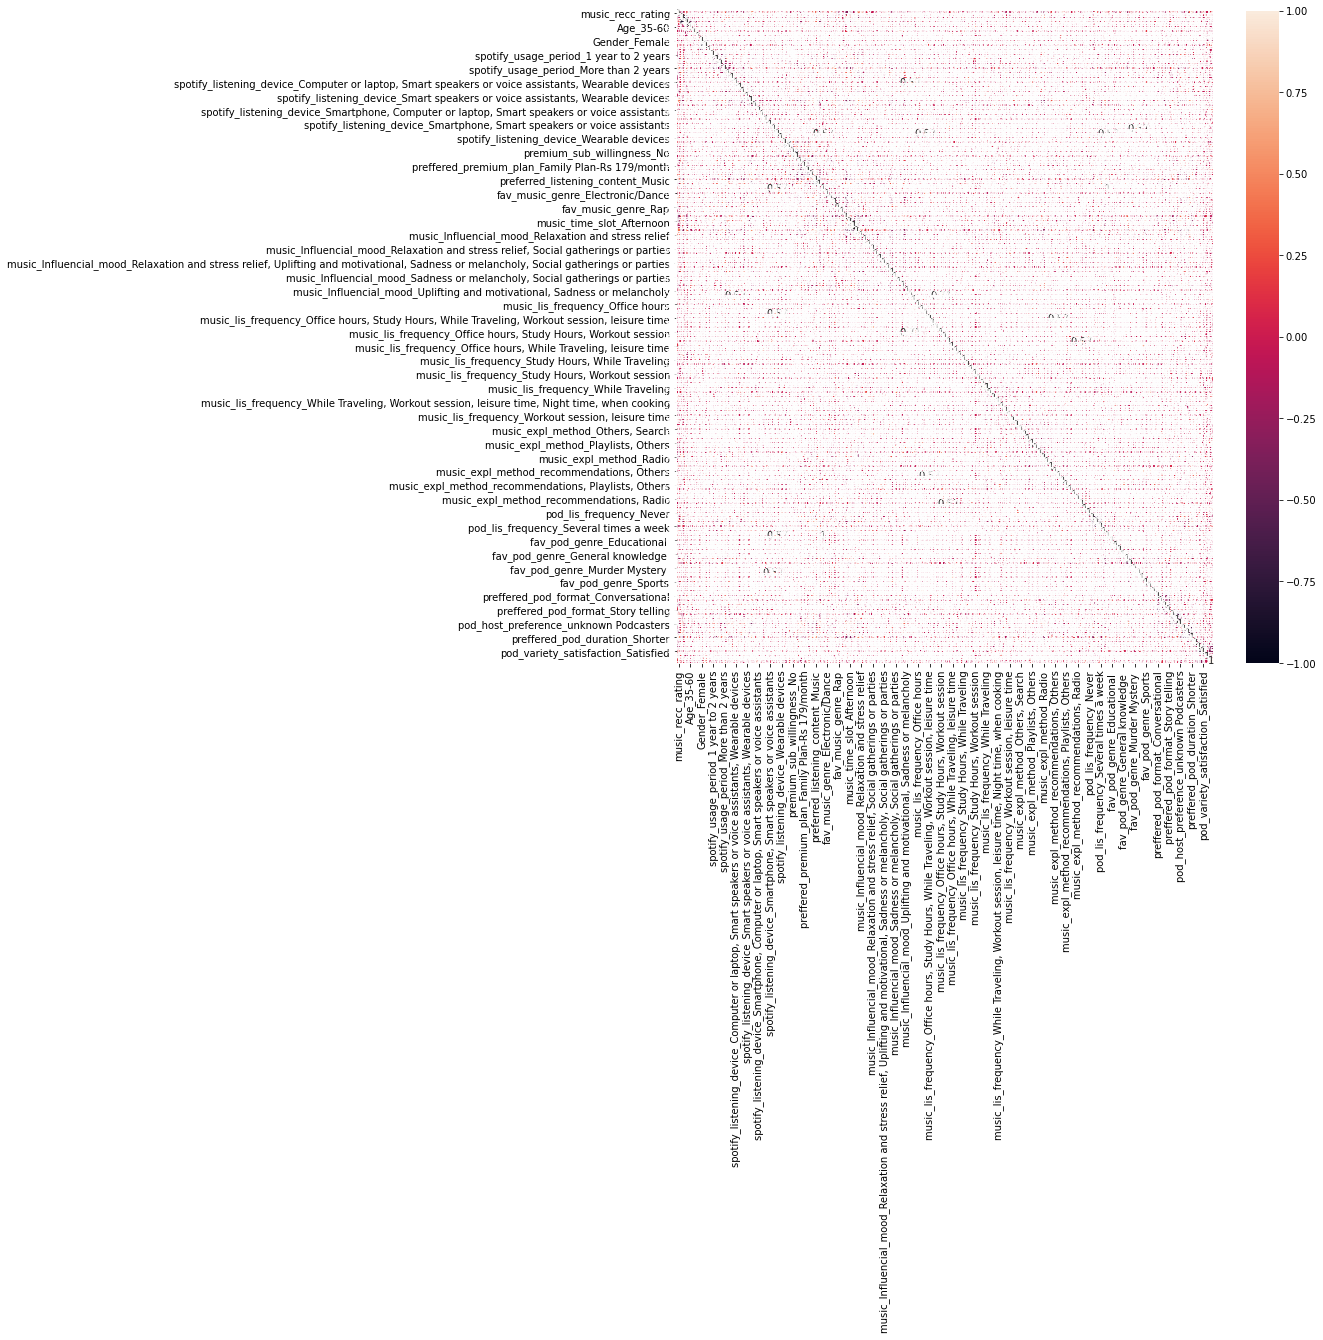

In [34]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(pd.get_dummies(user_data_noNA).corr(), annot=True)


In [28]:
category_mask= user_data_noNA.dtypes==object
category_columns = user_data_noNA.columns[category_mask].tolist()
#one hot decoding (label encoder)
user_data_noNA_oh=pd.DataFrame()
noNA_label_mappings = {}
for col in category_columns:
    le = LabelEncoder()
    user_data_noNA_oh[col] = le.fit_transform(user_data_noNA[col])
    noNA_label_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
#noNA_label_mappings

<AxesSubplot:>

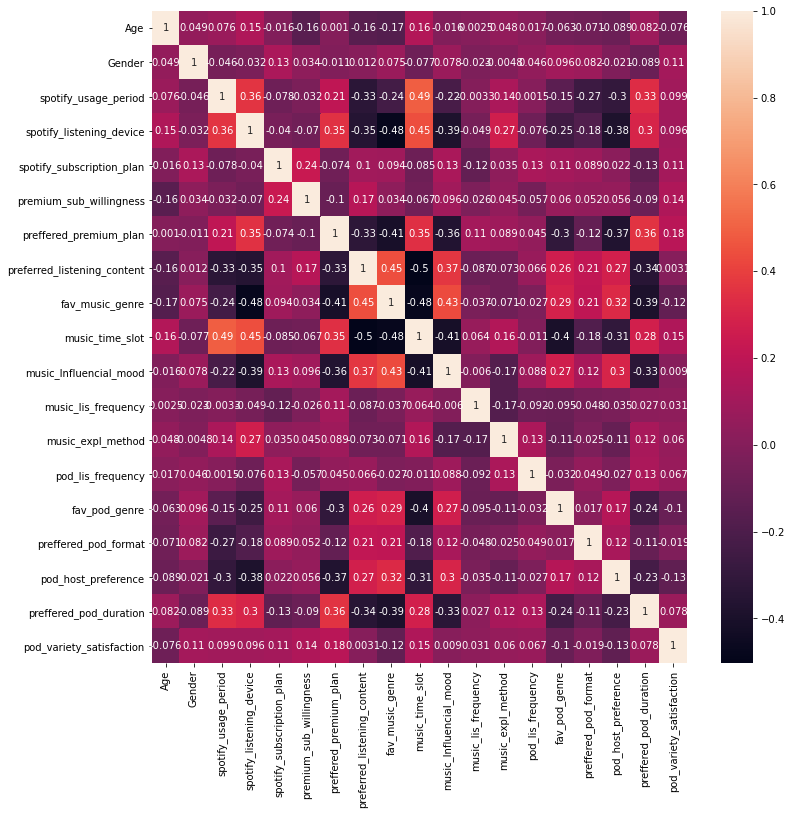

In [29]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(user_data_noNA_oh.corr(), annot=True)

<b> observation note: <br>
    

1. The time in a day a user plays the music (music_time_slot) moderately correlated (r= 049) the usage period that the user has been using Spotify (spotify_usage_period)
2. The time in a day a user plays the music (music_time_slot) moderately correlated (r= 045) the device they use when listening (spotify_listening_device)

但是經過 LabelEncode 後 Correlation 的結果其實沒有辦法告訴我什麼，因為 categorical 資料的共變其實沒有什麼意義？所以不應該使用 Correlation 做為 feature selection 的方法。

## Model Modification

<b> dropping None

In [57]:
user_data_NA = user_data.applymap(lambda x: None if x == 'None' else x)
user_data_noNA= user_data_NA.dropna()

In [58]:
category_mask= user_data_noNA.dtypes==object
category_columns = user_data_noNA.columns[category_mask].tolist()
#one hot decoding (label encoder)
user_data_noNA_oh=pd.DataFrame()
noNA_label_mappings = {}
for col in category_columns:
    le = LabelEncoder()
    user_data_noNA_oh[col] = le.fit_transform(user_data_noNA[col])
    noNA_label_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
#noNA_label_mappings

<b> MinMax Scaler

In [67]:
noNA_X= user_data_noNA_oh.drop("premium_sub_willingness", axis=1).values
no_NA_y= user_data_noNA_oh["premium_sub_willingness"].values

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
minmaxscaler= MinMaxScaler()
scaled_noNA_data= minmaxscaler.fit_transform(noNA_X)

In [84]:
minmaxscaler= MinMaxScaler()
scaled_data= minmaxscaler.fit_transform(X,y)

<b> Preprocessing (1) Feature Selection-1: Chi2 SelectKBest

In [99]:
x= all_user_data_oh.drop("premium_sub_willingness", axis=1)
y= all_user_data_oh["premium_sub_willingness"]

In [100]:
fs = SelectKBest(score_func= chi2, k='all')
selected_X_df= fs.fit_transform(x,y)

In [98]:
selected_feature_indices = fs.get_support(indices=True)
selected_feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [102]:
x.shape

(520, 18)

In [101]:
selected_feature_indices = fs.get_support(indices=True)
selected_features = x.columns[selected_feature_indices]
selected_features

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [92]:
fs = SelectKBest(score_func= chi2, k='all')
selected_scaled_X= fs.fit_transform(scaled_data, y)

In [93]:
#scaled_data
X_train, X_test, y_train, y_test= train_test_split(selected_scaled_X, y,
                                                   test_size= 0.2, random_state=42, stratify=y)

In [94]:
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.7115384615384616


In [80]:
X_train, X_test, y_train, y_test= train_test_split(selected_scaled_noNA_X, no_NA_y,
                                                   test_size= 0.2, random_state=42, stratify=y)

.score returns mean accuracy on the given test data and labels

In [81]:
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.6666666666666666


/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [82]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 7  9]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.72      0.79      0.75        29

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.62        45
weighted avg       0.65      0.67      0.66        45



In [30]:
user_data

Age  Gender  ... preffered_pod_duration pod_variety_satisfaction
0    20-35  Female  ...                   Both                       Ok
1    12-20    Male  ...                   None                Satisfied
2    35-60  Others  ...                   Both                Satisfied
3    20-35  Female  ...                   None                       Ok
4    20-35  Female  ...                   Both                       Ok
..     ...     ...  ...                    ...                      ...
515  20-35  Female  ...                Shorter                       Ok
516  20-35  Female  ...                Shorter                       Ok
517  20-35  Female  ...                Shorter                       Ok
518  20-35  Female  ...                 Longer                Satisfied
519  20-35  Female  ...                   None                       Ok

[520 rows x 20 columns]

<b> Preprocessing (2) LabelEncoder

Encode the nominal and categorical columns (data) in the table as Label, using sklearn.preprocessing LabelEncoder()

取出想要的 factor，可能先做個 statistical test，例如看看 correlation，再看看有沒有 na 要 drop, 再轉成 one hot 再fit maxminscaler()

## Subscription Willingness Classification

In [2]:
minmaxscaler= MinMaxScaler()
X_scaled= minmaxscaler.fit_transform(X)

NameError: name 'X' is not defined

In [352]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42, stratify=y)

<b> Feature Selection (Linear model- Lasso)

In [353]:
names=all_user_data_oh.drop("premium_sub_willingness", axis=1).columns.tolist()

0.001 [-5.65518191e-02  1.33943045e-02  6.31898039e-03 -6.22941979e-03
  3.34439971e-01 -9.80892579e-02  1.46723378e-01 -1.08432783e-03
  6.39764537e-03  1.49958166e-03 -5.35714772e-04  9.37531108e-03
 -2.57502373e-02 -1.97033388e-03 -3.55618268e-03 -1.03412093e-02
  1.43363132e-04  5.29459048e-02]


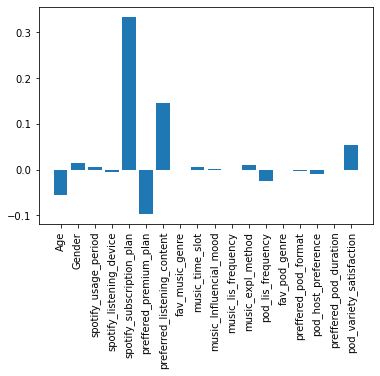

0.01 [-1.74549735e-02  0.00000000e+00  0.00000000e+00 -5.79534023e-03
  2.76589961e-01 -9.47437351e-02  7.06728598e-02  2.34557244e-03
 -0.00000000e+00  2.96174504e-03 -4.25684480e-04  9.28408763e-03
 -7.98282431e-03 -2.97351869e-04 -0.00000000e+00 -0.00000000e+00
 -2.71063604e-04  4.82463886e-02]


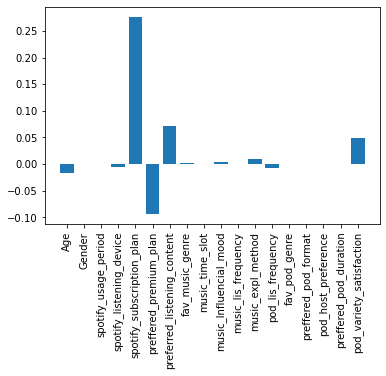

0.1 [-0.          0.         -0.         -0.00338538  0.         -0.0668303
  0.          0.         -0.          0.00981392 -0.00109083  0.00561223
  0.          0.         -0.          0.         -0.          0.        ]


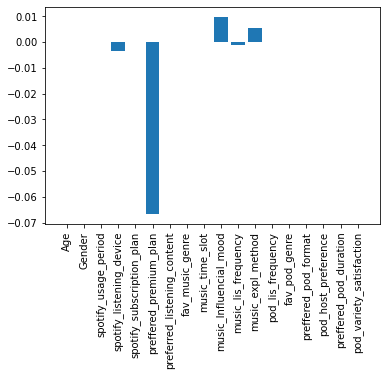

1.0 [-0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]


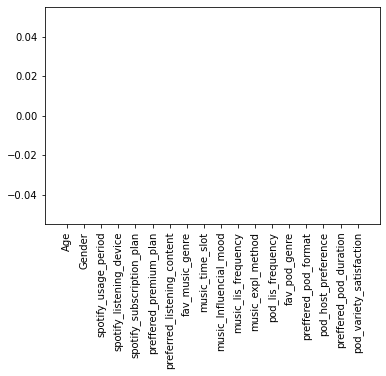

In [354]:
alphas = [0.001, 0.01, 0.1, 1.0]
ridge_scores = []
for alpha in alphas:
    lasso= Lasso(alpha=alpha)
    lasso_coef= lasso.fit(X,y).coef_
    print(alpha, lasso_coef)
    plt.bar(names, lasso_coef)
    plt.xticks(rotation=90)
    plt.show()

In [355]:
#alpha= 0.1, select the non-zero features
sel_features=['Age','spotify_listening_device','spotify_subscription_plan','preffered_premium_plan',
              'preferred_listening_content','fav_music_genre','music_Influencial_mood', 'music_expl_method',
              'pod_lis_frequency', 'pod_variety_satisfaction']

<b> set training and testing data

In [357]:
X_selected= all_user_data_oh[sel_features].values
y= all_user_data_oh["premium_sub_willingness"].values

In [359]:
names= all_user_data_oh[sel_features].columns.tolist()
X_selected_df=pd.DataFrame(X_selected, columns=names)

In [362]:
# selected feature XGBoost model
alluser_dmatrix = xgb.DMatrix(data=X_selected, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=alluser_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

Accuracy with PCA: 0.796154


In [339]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)),
    eval_metric="merror",
    use_label_encoder=False 
)


param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 0.1]
}

# set param for random_search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=25,  # general search
    scoring='accuracy',  
    n_jobs=-1,  #all CPU
    cv=4,  
    verbose=3,  
    random_state=42
)

# RandomSearch
random_search.fit(X_train, y_train)


# get best model/performance param
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print(f"Accuracy on test set: {accuracy}")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.9, 'max_depth': 6, 'eta': 0.05, 'alpha': 0}
Best Score: 0.8293269230769231
Accuracy on test set: 0.7307692307692307


In [340]:
# get pred for the tunned model
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred).astype(int) #rounded

#from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy: ", final_accuracy)

Final accuracy:  0.7307692307692307


## Performance Evaluation- Metrics

Confusion Matrix:
[[49 18]
 [10 27]]


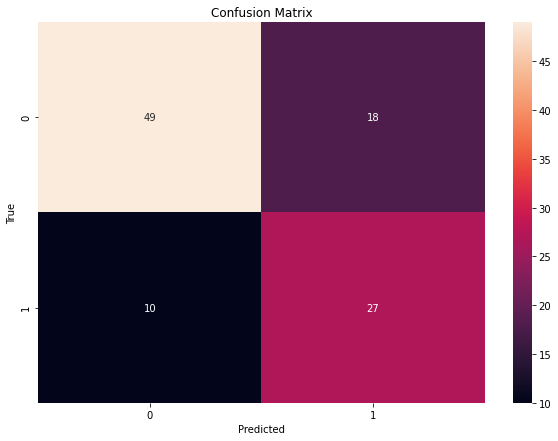

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        67
           1       0.60      0.73      0.66        37

    accuracy                           0.73       104
   macro avg       0.72      0.73      0.72       104
weighted avg       0.75      0.73      0.74       104



In [341]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# classification report 
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 分類報告
print(classification_report(y_test, y_pred))

## Model Evaluation- Important Features

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [23:35:24] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


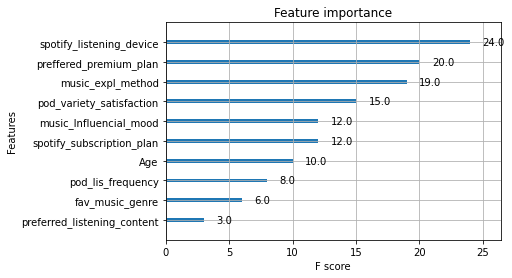

In [345]:
alluser_dmatrix = xgb.DMatrix(data=X_selected_df, label=y)

# Create the parameter dictionary: params
params = {"objective": "reg:linear",
          "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=alluser_dmatrix)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## PCA

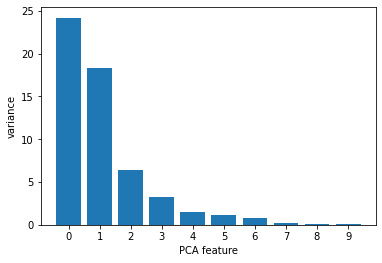

In [314]:
pca= PCA()
pca.fit(X_selected)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [316]:
#elbow
n_component=6
pca = PCA(n_components=n_component)
X_selected_pca = pca.fit_transform(X_selected)

In [318]:
X_train, X_test, y_train, y_test= train_test_split(X_selected_pca, y, test_size= 0.2, random_state=42, stratify=y)

In [317]:
# Train XGBoost model with PCA-transformed features
alluser_dmatrix = xgb.DMatrix(data=X_selected_pca, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=alluser_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

# Train XGBoost model with ridge regularization
# Use the original feature matrix X or apply PCA if desired


Accuracy with PCA: 0.696154


In [319]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)),
    eval_metric="merror",
    use_label_encoder=False  # 对于最新版本的XGBoost，避免使用标签编码器的警告
)


param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 0.1]
}

# 初始化RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=25,  # 可以调整为更高以进行更广泛的搜索
    scoring='accuracy',  # 根据问题可以调整评分标准
    n_jobs=-1,  # 使用所有的CPU核心
    cv=4,  # 4折交叉验证
    verbose=3,  # 可以调整输出的详细程度
    random_state=42
)

# 执行搜索
random_search.fit(X_train, y_train)

# 输出最佳参数和性能
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# 在测试集上评估性能
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'max_depth': 9, 'eta': 0.01, 'alpha': 0.1}
Best Score: 0.71875
Accuracy on test set: 0.7115384615384616


In [324]:
# 如果需要，可以在测试集上评估模型的最终性能
y_pred = best_model.predict(X_test)
# 根据具体问题转换y_pred，例如四舍五入得到最终分类结果
y_pred = np.round(y_pred).astype(int)

# 计算并打印最终的评估指标，比如准确率
#from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy: ", final_accuracy)

Final accuracy:  0.7115384615384616


Confusion Matrix:
[[51 16]
 [14 23]]


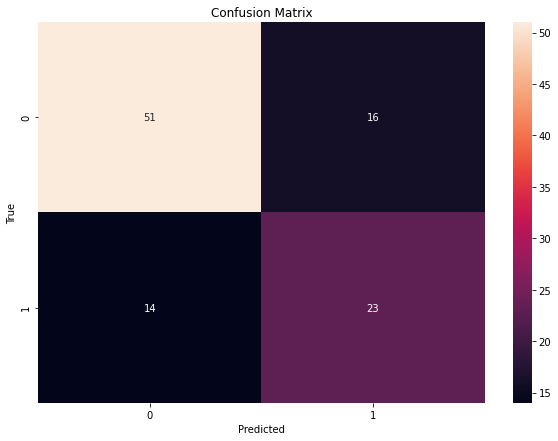

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        67
           1       0.59      0.62      0.61        37

    accuracy                           0.71       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.72      0.71      0.71       104



In [325]:
# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 可視化混淆矩陣
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 分類報告
print(classification_report(y_test, y_pred))

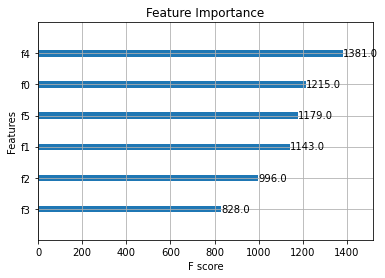

In [327]:
# importance for features (Hard to interpret)
xgb.plot_importance(best_model)
plt.title('Feature Importance')
plt.show()

# Pod Data- Model Selection

In [121]:
X= pod_user_data_oh.drop("pod_variety_satisfaction", axis=1).values
y= pod_user_data_oh["pod_variety_satisfaction"].values

In [122]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42, stratify=y)

In [124]:
models={
  "Logistic Regression": LogisticRegression(), 
  "KNN": KNeighborsClassifier(),
  "Decision Tree": DecisionTreeClassifier()
}
training_result=[]

for model in models.values():
    kf= KFold(n_splits=5, random_state=42, shuffle=True)
    cv_result=cross_val_score(model, X_train, y_train, cv=kf)
    training_result.append(cv_result)

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

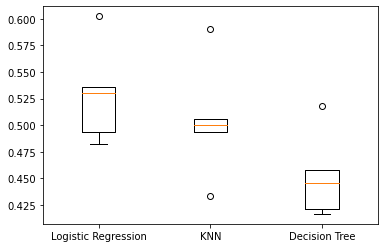

In [125]:
plt.boxplot(training_result, labels=models.keys())
plt.show()

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [127]:
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.5192307692307693


/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [129]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  2  2  0  0]
 [ 0 43 13  0  0]
 [ 0 19 11  0  2]
 [ 0  2  0  0  0]
 [ 0  4  6  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.61      0.77      0.68        56
           2       0.34      0.34      0.34        32
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10

    accuracy                           0.52       104
   macro avg       0.19      0.22      0.21       104
weighted avg       0.44      0.52      0.47       104



/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
# Compute RMSE
r_squared = logreg.score(X_test, y_test)
rmse = mean_squared_error(y_test, pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.5192307692307693
RMSE: 1.0651832633943252


# XGBoosts

In [202]:
#optimal data structure created by XGB- DMatrix
pod_dmatrix= xgb.DMatrix(data= X,label= y)
#create cross validation parameters dict
param= {"objective": "multi:softmax", 
        "max_depth":10, 
        "num_class": len(set(y))}
#call cross validation
# Call cross-validation
cv_results = xgb.cv(
    dtrain=pod_dmatrix,
    params=param,
    nfold=10,  # Number of validation folds
    num_boost_round=100,  # Number of trees we want to build
    metrics="merror",  # The metric we want to compute (multi-class error rate)
    as_pandas=True  # Output stored as pd.DataFrame
)

# Print Accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy: %f" % accuracy)

Accuracy: 0.480769


## PCA

In [142]:
from sklearn.decomposition import PCA

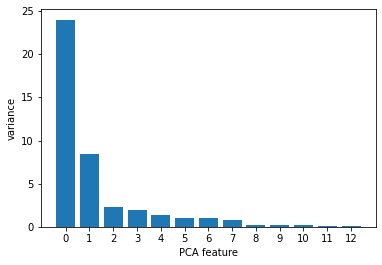

In [144]:
pca= PCA()
pca.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [208]:
#elbow
n_component=7
pca = PCA(n_components=n_component)
X_pca = pca.fit_transform(X)

In [163]:
names=pod_user_data_oh.drop("pod_variety_satisfaction", axis=1).columns.tolist()

In [219]:
pod_user_data.describe()

Age  Gender  ... preffered_pod_duration pod_variety_satisfaction
count     520     520  ...                    520                      520
unique      5       3  ...                      4                        5
top     20-35  Female  ...                Shorter                       Ok
freq      422     391  ...                    191                      280

[4 rows x 14 columns]

## Feature Selection

In [ ]:
from sklearn.linear_model import Lasso

0.001 [-8.18936053e-02  1.60581710e-01  8.01580638e-03  7.37069570e-03
  1.39607329e-01  2.80068205e-01  5.27065965e-02  8.15062945e-02
  7.99521828e-02 -1.97244168e-02 -3.84472514e-02  1.63679579e-04
  7.45932818e-03]


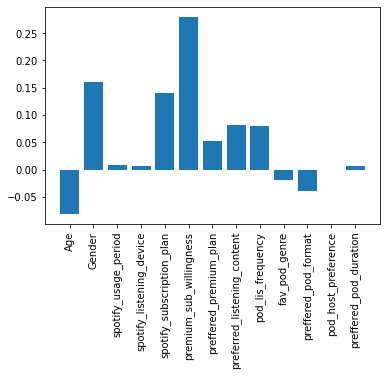

0.01 [-0.04329584  0.1277265   0.00076959  0.00351189  0.08827515  0.25487051
  0.03778877  0.01135186  0.07710017 -0.0192276  -0.0341402  -0.
 -0.        ]


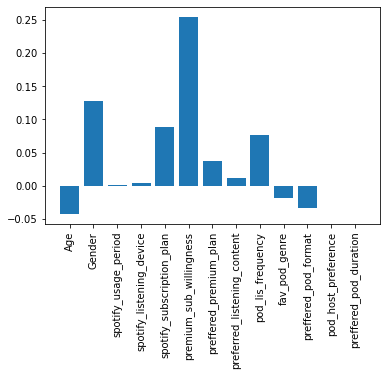

0.1 [-0.          0.          0.         -0.          0.          0.
 -0.          0.          0.0139107  -0.01760715 -0.          0.
 -0.        ]


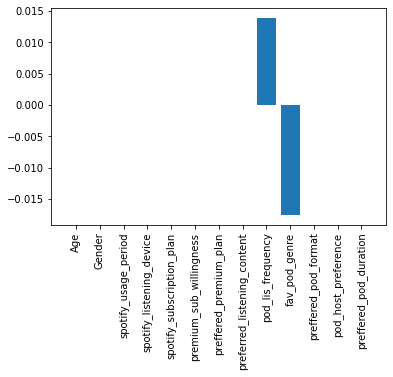

1.0 [-0.  0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0.]


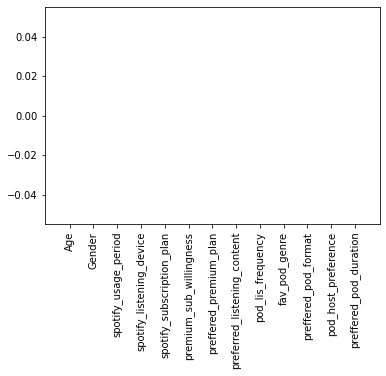

In [172]:
alphas = [0.001, 0.01, 0.1, 1.0]
ridge_scores = []
for alpha in alphas:
    lasso= Lasso(alpha=alpha)
    lasso_coef= lasso.fit(X,y).coef_
    print(alpha, lasso_coef)
    plt.bar(names, lasso_coef)
    plt.xticks(rotation=90)
    plt.show()

In [250]:
dropping_cols=['spotify_usage_period','spotify_listening_device','pod_host_preference','preffered_pod_duration',"pod_variety_satisfaction"]
selecting_cols=['pod_lis_frequency', 'fav_pod_genre']

In [230]:
#try1
X_selected= pod_user_data_oh.drop(dropping_cols, axis=1).values
y= pod_user_data_oh["pod_variety_satisfaction"].values

In [253]:
#try2
X_selected_2features= pod_user_data_oh[selecting_cols].values
y= pod_user_data_oh["pod_variety_satisfaction"].values

### Try1

In [232]:
#elbow
n_component=7
pca = PCA(n_components=n_component)
X_pca_selected = pca.fit_transform(X_selected)

In [233]:
# Train XGBoost model with PCA-transformed features
pod_dmatrix = xgb.DMatrix(data=X_pca_selected, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=pod_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

# Train XGBoost model with ridge regularization
# Use the original feature matrix X or apply PCA if desired


Accuracy with PCA: 0.513462


In [234]:
X_train, X_test, y_train, y_test= train_test_split(X_pca_selected,y, test_size= 0.2, random_state=42, stratify=y)

### Try2

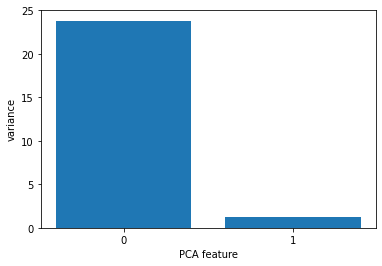

In [256]:
pca= PCA()
pca.fit(X_selected_2features)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
X_train, X_test, y_train, y_test= train_test_split(X_selected_2features,y, test_size= 0.2, random_state=42, stratify=y)

In [257]:
#elbow
pca = PCA(n_components=2)
X_pca_selected_2 = pca.fit_transform(X_selected_2features)

In [258]:
# Train XGBoost model with PCA-transformed features
pod_dmatrix = xgb.DMatrix(data=X_pca_selected_2, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=pod_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

# Train XGBoost model with ridge regularization
# Use the original feature matrix X or apply PCA if desired


Accuracy with PCA: 0.538462


In [279]:
from xgboost import XGBClassifier

In [280]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)),
    eval_metric="merror",
    use_label_encoder=False  # 对于最新版本的XGBoost，避免使用标签编码器的警告
)


param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 0.1]
}

# 初始化RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=25,  # 可以调整为更高以进行更广泛的搜索
    scoring='accuracy',  # 根据问题可以调整评分标准
    n_jobs=-1,  # 使用所有的CPU核心
    cv=4,  # 4折交叉验证
    verbose=3,  # 可以调整输出的详细程度
    random_state=42
)

# 执行搜索
random_search.fit(X_train, y_train)

# 输出最佳参数和性能
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# 在测试集上评估性能
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'max_depth': 4, 'eta': 0.05, 'alpha': 0}
Best Score: 0.5336538461538461
Accuracy on test set: 0.5865384615384616


In [281]:
# 输出最佳迭代次数
print("Best iteration: ", best_model.best_iteration)

# 如果需要，可以在测试集上评估模型的最终性能
y_pred = best_model.predict(dtest)
# 根据具体问题转换y_pred，例如四舍五入得到最终分类结果
y_pred = np.round(y_pred).astype(int)

# 计算并打印最终的评估指标，比如准确率
#from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy: ", final_accuracy)


AttributeError: `best_iteration` is only defined when early stopping is used.

Confusion Matrix:
[[ 0  1  3  0  0]
 [ 0 39 14  0  3]
 [ 0 14 18  0  0]
 [ 0  2  0  0  0]
 [ 0  4  5  0  1]]


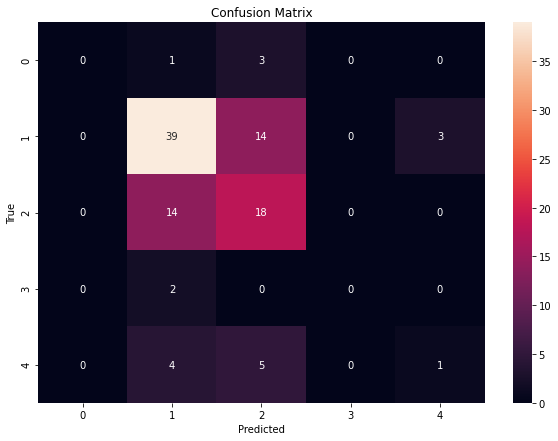

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.65      0.70      0.67        56
           2       0.45      0.56      0.50        32
           3       0.00      0.00      0.00         2
           4       0.25      0.10      0.14        10

    accuracy                           0.56       104
   macro avg       0.27      0.27      0.26       104
weighted avg       0.51      0.56      0.53       104



/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 可視化混淆矩陣
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 分類報告
print(classification_report(y_test, y_pred))

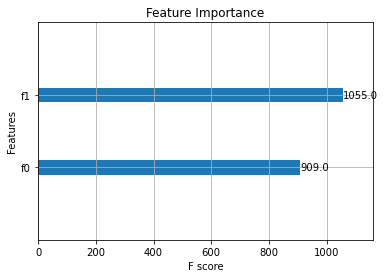

In [283]:
# 繪製特徵重要性
xgb.plot_importance(final_model)
plt.title('Feature Importance')
plt.show()

In [260]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

In [261]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca_selected_2, y, cv=kfold)
print(results.mean())

0.5153846153846153


In [262]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred)

In [263]:
accuracy

0.5769230769230769

### Hyper parameter Tuning

In [235]:

# 假設X_pca和y已經準備好並處理過
pod_dmatrix = xgb.DMatrix(data=X_pca, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 10,
    "num_class": len(set(y)),
    "alpha": 0.1  # 初始設置，可根據需求調整
}

# 擴展參數列表以包括eta和subsample
etas = [0.01, 0.1, 0.2]
subs = [0.5, 0.75, 1]

best_params = None
min_error = float("inf")  # 初始化最小錯誤率為無限大
for eta in etas:
    for sub in subs:
        param['eta'] = eta
        param['subsample'] = sub
        cv_results = xgb.cv(
            dtrain=pod_dmatrix,
            params=param,
            nfold=4,
            num_boost_round=100,  # 增加迭代次數以觀察長期表現
            metrics="merror",
            as_pandas=True,
            early_stopping_rounds=10  # 添加早停以防過擬合
        )
        mean_merror = cv_results["test-merror-mean"].min()
        if mean_merror < min_error:
            min_error = mean_merror
            best_params = (eta, sub)

# 最優化的參數
print(f"Best Params:\nETA: {best_params[0]}, Subsample: {best_params[1]}")
print(f"Lowest Mean MError: {min_error}")

# 計算並列印最佳參數下的準確率
accuracy = 1 - min_error
print(f"Accuracy with PCA and Optimized Params: {accuracy}")


Best Params:
ETA: 0.01, Subsample: 0.5
Lowest Mean MError: 0.48269230769230764
Accuracy with PCA and Optimized Params: 0.5173076923076924


In [237]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

In [239]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca_selected, y, cv=kfold)
print(results.mean())

0.5173076923076924


In [189]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca, y, cv=kfold)
print(results.mean())

0.4461538461538462


In [240]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred)

In [242]:
accuracy #no over-fitting generalizability preserved

0.5576923076923077

In [188]:
accuracy

0.4230769230769231

# Pod Dataset

In [42]:
models={
  "Logistic Regression": LogisticRegression(), 
  "KNN": KNeighborsClassifier()
}
training_result=[]

for model in models.values():
    kf= KFold(n_splits=5, random_state=42, shuffle=True)
    cv_result=cross_val_score(model, X_train, y_train, cv=kf)
    training_result.append(cv_result)

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

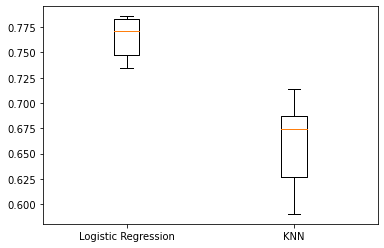

In [43]:
plt.boxplot(training_result, labels=models.keys())
plt.show()

In [44]:
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.7115384615384616


/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [47]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[54 13]
 [17 20]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        67
           1       0.61      0.54      0.57        37

    accuracy                           0.71       104
   macro avg       0.68      0.67      0.68       104
weighted avg       0.71      0.71      0.71       104



In [48]:
# Compute RMSE
r_squared = logreg.score(X_test, y_test)
rmse = mean_squared_error(y_test, pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.7115384615384616
RMSE: 0.5370861555295746


In [110]:
user_data=pd.read_csv('/Users/christina/Desktop/Data Career/User_Behavior/Spotify_User_Behavior.csv')
pod_user_data = pd.concat([user_data.iloc[:, :8], user_data.iloc[:, -6:]],axis=1)
pod_user_data.describe()

category_mask= pod_user_data.dtypes==object
category_columns = pod_user_data.columns[category_mask].tolist()
#one hot decoding (label encoder)
pod_user_data_oh=pd.DataFrame()
label_mappings = {}
for col in category_columns:
    le = LabelEncoder()
    pod_user_data_oh[col] = le.fit_transform(pod_user_data[col])
    label_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
#label_mappings